# 绪论

# 0 远程拉取项目

In [ ]:
# ===== 第 0 步：初始化项目（学生无需理解） =====
import os

REPO_NAME = "sjtu-ML"
REPO_URL  = "https://github.com/sihaobao/sjtu-ML.git"

# 1. 如果仓库不存在，则 clone
if not os.path.exists(f"/content/{REPO_NAME}"):
    !git clone {REPO_URL}

# 2. 切换到仓库根目录
os.chdir(f"/content/{REPO_NAME}")

# 3. 切换到当前实验目录（数据就在这里）
os.chdir("第一章-绪论")

print("✅ 当前工作目录：", os.getcwd())
print("✅ 当前目录文件：", os.listdir("."))

## 1 示例数据集介绍

In [239]:
# 导入必要的库
import pandas as pd  # 处理表格型数据的核心库
import numpy as np   # 数值计算库

In [240]:
# 导入数据集
# 注意：将路径替换为你实际的数据集路径或运用相对路径（需要数据集和notebook在同一文件夹）
df = pd.read_csv("绪论数据集-2018.4.1-4.30光伏数据集.csv")

In [241]:
# 查看数据集基本信息
print("="*50)
print("查看数据集前5行（默认）：")
print(df.head())  # 若想看前10行：df.head(10)

查看数据集前5行（默认）：
       timestamp  Active_Power  Weather_Temperature_Celsius  \
0  2018/4/1 0:00           0.0                    19.779453   
1  2018/4/1 0:05           0.0                    19.714937   
2  2018/4/1 0:10           0.0                    19.549330   
3  2018/4/1 0:15           0.0                    19.405870   
4  2018/4/1 0:20           0.0                    19.387363   

   Weather_Relative_Humidity  Global_Horizontal_Radiation  \
0                  40.025826                     3.232706   
1                  39.605961                     3.194991   
2                  39.608631                     3.070866   
3                  39.680702                     3.038623   
4                  39.319881                     2.656474   

   Diffuse_Horizontal_Radiation  Wind_Direction  Weather_Daily_Rainfall  
0                      1.690531       64.372742                     0.0  
1                      1.576346       65.954178                     0.0  
2                 

In [242]:
# 查看数据集形状
print("\n" + "="*50)
print("查看数据集的形状（行数, 列数）：")
print(f"数据集共有 {df.shape[0]} 行，{df.shape[1]} 列")


查看数据集的形状（行数, 列数）：
数据集共有 8640 行，8 列


In [243]:
# 查看数据集列名
print("\n" + "="*50)
print("查看数据集的列名：")
print(df.columns.tolist())


查看数据集的列名：
['timestamp', 'Active_Power', 'Weather_Temperature_Celsius', 'Weather_Relative_Humidity', 'Global_Horizontal_Radiation', 'Diffuse_Horizontal_Radiation', 'Wind_Direction', 'Weather_Daily_Rainfall']


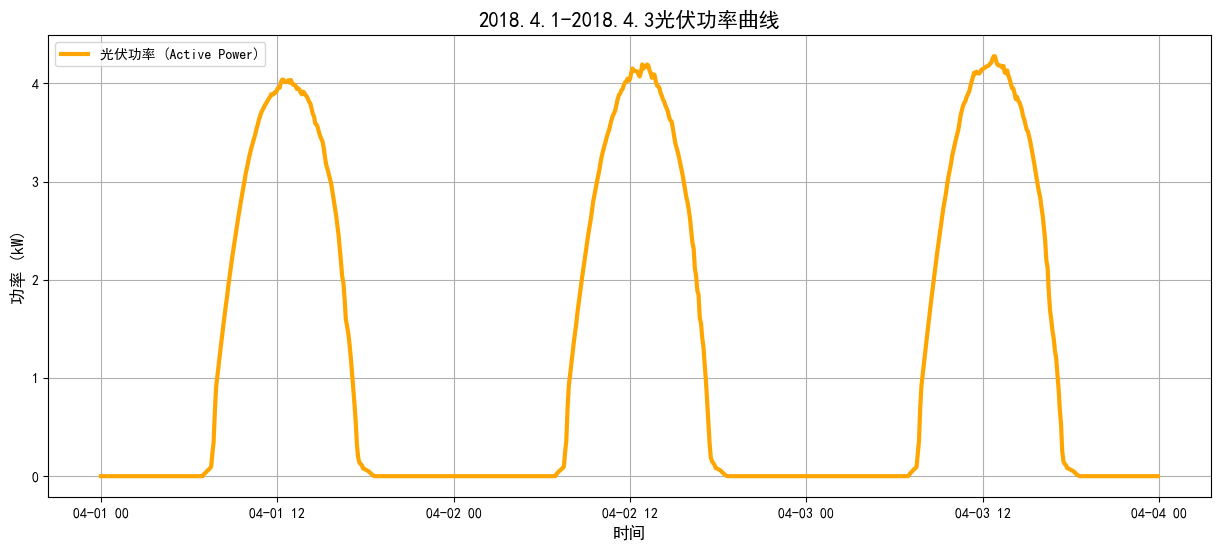

In [244]:
#绘制2018.4.1-4.3的光伏功率图

import matplotlib.pyplot as plt #处理绘图核心库

# 设置字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

# 将 timestamp 列转换为日期时间格式
df['timestamp'] = pd.to_datetime(df['timestamp'])

# 筛选2018年4月1日到2018年4月3日的数据
mask = (df['timestamp'] >= '2018-04-01') & (df['timestamp'] < '2018-04-04')
df_filtered = df.loc[mask]

# 绘图
plt.figure(figsize=(15, 6))
plt.plot(df_filtered['timestamp'], df_filtered['Active_Power'], color='orange', linewidth=3, label='光伏功率 (Active Power)')

# 添加图表信息
plt.title('2018.4.1-2018.4.3光伏功率曲线', fontsize=15)
plt.xlabel('时间', fontsize=12)
plt.ylabel('功率 (kW)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


## 2 数据处理

### 2.1 缺失数据处理

In [245]:
# 检测 'Active_Power' 列是否有数据缺失

# 计算该列中缺失值的总数
missing_count = df['Active_Power'].isnull().sum()

# 计算缺失值的比例（百分比）
missing_percentage = (missing_count / len(df)) * 100

print(f"--- 'Active_Power' 列缺失值检测结果 ---")
print(f"缺失值总数: {missing_count} 个")
print(f"缺失值占比: {missing_percentage:.2f}%")

# 筛选出 Active_Power 列为空的行，并只取其时间列
missing_times = df[df['Active_Power'].isnull()]['timestamp']

if not missing_times.empty:
    print("--- 缺失数据对应的时间点 ---")
    # to_string(index=False) 是为了只打印时间，不打印索引序号
    print(missing_times.to_string(index=False))
else:
    print("没有缺失的时间点。")

--- 'Active_Power' 列缺失值检测结果 ---
缺失值总数: 28 个
缺失值占比: 0.32%
--- 缺失数据对应的时间点 ---
2018-04-19 08:15:00
2018-04-19 09:05:00
2018-04-19 09:10:00
2018-04-19 09:15:00
2018-04-19 09:20:00
2018-04-19 09:40:00
2018-04-19 09:45:00
2018-04-19 09:50:00
2018-04-19 10:20:00
2018-04-19 10:25:00
2018-04-19 11:20:00
2018-04-19 11:25:00
2018-04-19 12:20:00
2018-04-19 12:25:00
2018-04-19 13:20:00
2018-04-19 13:25:00
2018-04-19 14:20:00
2018-04-19 14:25:00
2018-04-19 15:20:00
2018-04-19 15:25:00
2018-04-19 16:20:00
2018-04-19 16:25:00
2018-04-19 17:20:00
2018-04-19 17:25:00
2018-04-19 19:20:00
2018-04-19 19:25:00
2018-04-19 22:20:00
2018-04-19 22:25:00


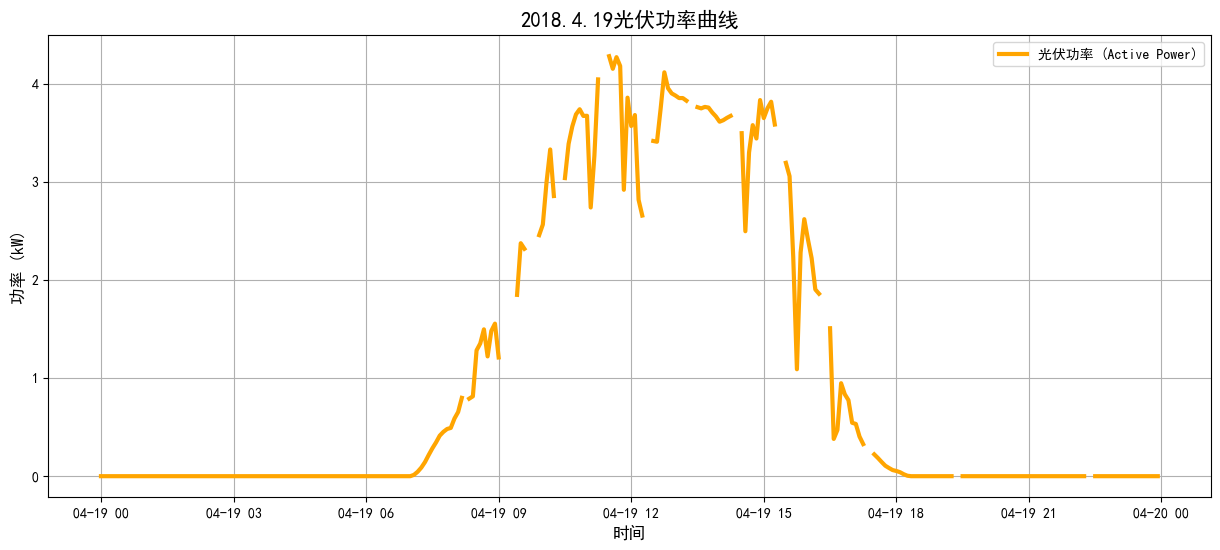

In [246]:
# 绘制4月19日曲线
mask = (df['timestamp'] >= '2018-04-19') & (df['timestamp'] < '2018-04-20')
df_filtered = df.loc[mask]

# 绘图
plt.figure(figsize=(15, 6))
plt.plot(df_filtered['timestamp'], df_filtered['Active_Power'], color='orange', linewidth=3, label='光伏功率 (Active Power)')

# 添加图表信息
plt.title('2018.4.19光伏功率曲线', fontsize=15)
plt.xlabel('时间', fontsize=12)
plt.ylabel('功率 (kW)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

### 2.1.1 平均值插补处理

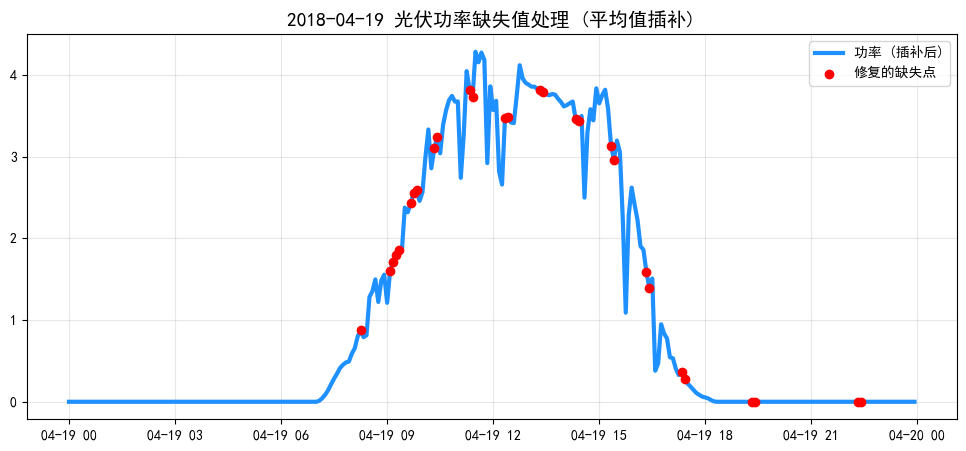

In [247]:
#平均值插补

import pandas as pd
import matplotlib.pyplot as plt

# 1. 环境配置：解决中文显示
plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False

# 2. 读取数据：直接在读取时处理好时间格式和索引
df = pd.read_csv('绪论数据集-2018.4.1-4.30光伏数据集.csv', parse_dates=['timestamp'], index_col='timestamp')

# 3. 【核心】：使用平均值 (.mean) 填充
df['Imputed_Power'] = df['Active_Power'].fillna(
    df['Active_Power'].rolling(window=11, center=True, min_periods=1).mean()
)

# 4. 筛选4月19日这一天的数据用于展示
df_day = df.loc['2018-04-19']

# 5. 可视化
plt.figure(figsize=(12, 5))

# 绘制插补后的完整曲线
plt.plot(df_day.index, df_day['Imputed_Power'], label='功率 (插补后)', color='dodgerblue', linewidth=3)

# 找出原本缺失的点，用红点标出来
missing_mask = df_day['Active_Power'].isna()
plt.scatter(df_day.index[missing_mask], df_day.loc[missing_mask, 'Imputed_Power'], 
            color='red', label='修复的缺失点', zorder=5)

plt.title('2018-04-19 光伏功率缺失值处理 (平均值插补)', fontsize=14)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

### 2.1.2 中位数插补处理

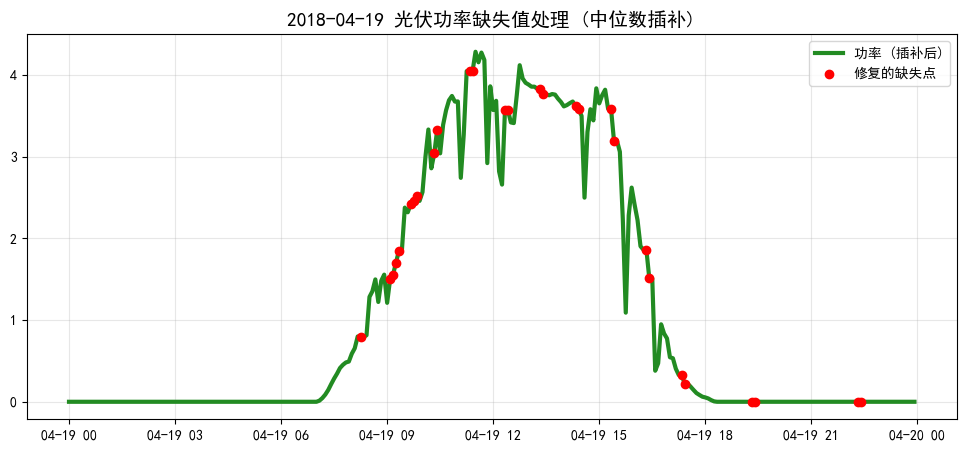

In [248]:
#中位数插补

import pandas as pd
import matplotlib.pyplot as plt

# 1. 环境配置：解决中文显示
plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False

# 2. 读取数据：直接在读取时处理好时间格式和索引
df = pd.read_csv('绪论数据集-2018.4.1-4.30光伏数据集.csv', parse_dates=['timestamp'], index_col='timestamp')

# 3. 【核心】插补缺失值 (这里使用前后5个点的中位数进行填充)
# .rolling(window=11, center=True) 表示取当前点及前后各5个点，共11个点
# .median() 计算中位数；.fillna() 将计算结果填入缺失位置
df['Imputed_Power'] = df['Active_Power'].fillna(
    df['Active_Power'].rolling(window=11, center=True, min_periods=1).median()
)

# 4. 筛选4月19日这一天的数据用于展示
df_day = df.loc['2018-04-19']

# 5. 可视化
plt.figure(figsize=(12, 5))

# 绘制插补后的完整曲线
plt.plot(df_day.index, df_day['Imputed_Power'], label='功率 (插补后)', color='forestgreen', linewidth=3)

# 找出原本缺失的点，用红点标出来
missing_mask = df_day['Active_Power'].isna()
plt.scatter(df_day.index[missing_mask], df_day.loc[missing_mask, 'Imputed_Power'], 
            color='red', label='修复的缺失点', zorder=5)

plt.title('2018-04-19 光伏功率缺失值处理 (中位数插补)', fontsize=14)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

### 2.1.3 函数插补处理（以二阶多项式为例）

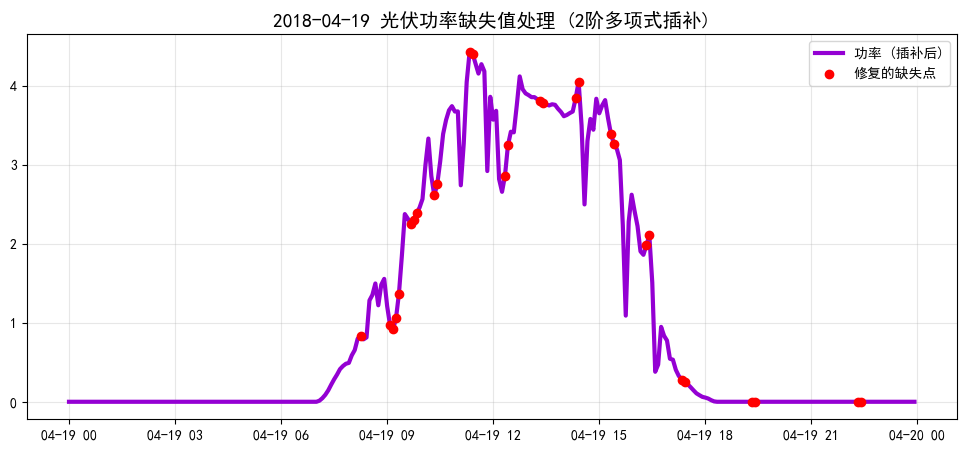

In [249]:
#二阶多项式插补

import pandas as pd
import matplotlib.pyplot as plt

# 1. 环境配置：解决中文显示
plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False

# 2. 读取数据：直接在读取时处理好时间格式和索引
df = pd.read_csv('绪论数据集-2018.4.1-4.30光伏数据集.csv', parse_dates=['timestamp'], index_col='timestamp')

# 3. 【核心】：二阶多项式插补
# method='polynomial' 表示多项式，order=2 表示二阶（抛物线）
df['Poly_Power'] = df['Active_Power'].interpolate(method='polynomial', order=2)

# 4. 筛选4月19日这一天的数据用于展示
df_day = df.loc['2018-04-19']

# 5. 可视化
plt.figure(figsize=(12, 5))

# 绘制插补后的完整曲线
plt.plot(df_day.index, df_day['Poly_Power'], label='功率 (插补后)', color='darkviolet', linewidth=3)

# 找出原本缺失的点，用红点标出来
missing_mask = df_day['Active_Power'].isna()
plt.scatter(df_day.index[missing_mask], df_day.loc[missing_mask, 'Poly_Power'], 
            color='red', label='修复的缺失点', zorder=5)

plt.title('2018-04-19 光伏功率缺失值处理 (2阶多项式插补)', fontsize=14)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

### 2.1.4 最近邻插补处理（KNN插补）

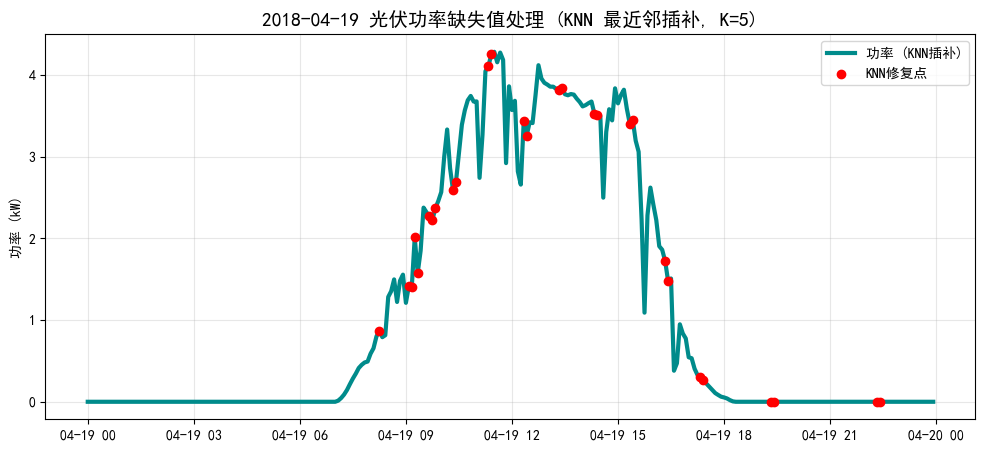

In [250]:
#最近邻插补代码

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer  # 导入机器学习库中的 KNN 插补器

# 1. 环境配置
plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False

# 2. 读取数据
df = pd.read_csv('绪论数据集-2018.4.1-4.30光伏数据集.csv', parse_dates=['timestamp'], index_col='timestamp')

# 3. 【核心】：最近邻插补 (KNN)
# n_neighbors=5 表示参考最像的 5 个样本；如果设为 1，即热卡填充
imputer = KNNImputer(n_neighbors=5)

# 注意：KNN 根据表中所有特征，即表中的第三列至第八列（温度、辐射等）来寻找最相似的行，所以我们对整个表进行操作
# imputer.fit_transform 会返回一个 Numpy 数组，我们需要把它转回 DataFrame
df_imputed_array = imputer.fit_transform(df)
df_knn = pd.DataFrame(df_imputed_array, columns=df.columns, index=df.index)

# 4. 可视化 4月19日 的结果
target_day = '2018-04-19'
df_day_original = df.loc[target_day]  # 原始含缺失值的数据
df_day_knn = df_knn.loc[target_day]    # 插补后的数据

plt.figure(figsize=(12, 5))

# 绘制插补后的曲线
plt.plot(df_day_knn.index, df_day_knn['Active_Power'], label='功率 (KNN插补)', color='darkcyan', linewidth=3)

# 标记修复的点
missing_mask = df_day_original['Active_Power'].isna()
plt.scatter(df_day_original.index[missing_mask], df_day_knn.loc[missing_mask, 'Active_Power'], 
            color='red', label='KNN修复点', zorder=5)

plt.title(f'2018-04-19 光伏功率缺失值处理 (KNN 最近邻插补, K=5)', fontsize=14)
plt.ylabel('功率 (kW)')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

### 2.1.5 不同插补方法结果对比

--- 各插补方法误差评估 (RMSE越小越好) ---
平均值      | RMSE: 0.2762
中位数      | RMSE: 0.2525
二阶多项式    | RMSE: 0.3237
KNN插补    | RMSE: 0.1679


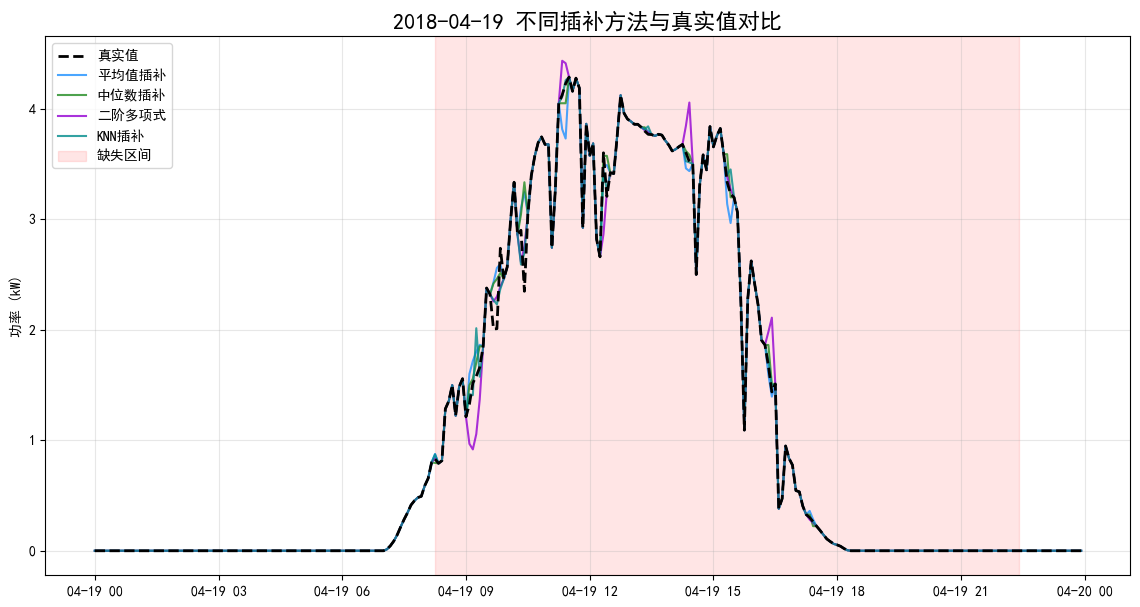

In [251]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 1. 环境配置
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 2. 读取数据
df_inc = pd.read_csv('绪论数据集-2018.4.1-4.30光伏数据集.csv', parse_dates=['timestamp'], index_col='timestamp')
df_true = pd.read_csv('绪论数据集-2018.4.19完整光伏功率数据.csv', parse_dates=['timestamp'], index_col='timestamp')

# 3. 4月19日 缺失点的位置
target_day = '2018-04-19'
missing_mask = df_inc.loc[target_day, 'Active_Power'].isna()
missing_indices = df_inc.loc[target_day].index[missing_mask]

# 4. 执行四种插补
# (1) 平均值
df_mean = df_inc['Active_Power'].fillna(df_inc['Active_Power'].rolling(11, center=True, min_periods=1).mean()).loc[target_day]
# (2) 中位数
df_med  = df_inc['Active_Power'].fillna(df_inc['Active_Power'].rolling(11, center=True, min_periods=1).median()).loc[target_day]
# (3) 二阶多项式
df_poly = df_inc['Active_Power'].interpolate(method='polynomial', order=2).loc[target_day]
# (4) KNN (需要所有特征)
imputer = KNNImputer(n_neighbors=5)
df_knn_all = pd.DataFrame(imputer.fit_transform(df_inc), columns=df_inc.columns, index=df_inc.index)
df_knn = df_knn_all.loc[target_day, 'Active_Power']

# 5. 计算误差 (只针对缺失的那段数据)
y_true = df_true.loc[missing_indices, 'Active_Power']
methods = {'平均值': df_mean, '中位数': df_med, '二阶多项式': df_poly, 'KNN插补': df_knn}

print("--- 各插补方法误差评估 (RMSE越小越好) ---")
for name, df_res in methods.items():
    rmse = np.sqrt(mean_squared_error(y_true, df_res[missing_indices]))
    print(f"{name:8} | RMSE: {rmse:.4f}")

# 6. 可视化对比图
plt.figure(figsize=(14, 7))
plt.plot(df_true.index, df_true['Active_Power'], 'k--', label='真实值', linewidth=2, zorder=10)
plt.plot(df_mean.index, df_mean, label='平均值插补', color='dodgerblue', alpha=0.8)
plt.plot(df_med.index, df_med, label='中位数插补', color='forestgreen', alpha=0.8)
plt.plot(df_poly.index, df_poly, label='二阶多项式', color='darkviolet', alpha=0.8)
plt.plot(df_knn.index, df_knn, label='KNN插补', color='darkcyan', alpha=0.8)

# 用阴影标出缺失区域
plt.axvspan(missing_indices[0], missing_indices[-1], color='red', alpha=0.1, label='缺失区间')

plt.title('2018-04-19 不同插补方法与真实值对比', fontsize=16)
plt.ylabel('功率 (kW)')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

## 2.2 异常值辨识

### 2.2.1 直接观察

In [252]:
#检测光伏功率小于0的点

import pandas as pd

# 1. 导入数据集
file_path = '绪论数据集-2018.4.1-4.30光伏数据集.csv'
df = pd.read_csv(file_path)

# 2. 将时间列转换为日期格式，方便打印
df['timestamp'] = pd.to_datetime(df['timestamp'])

# 3. 检测光伏功率小于 0 的异常点
# 筛选出 Active_Power 小于 0 的所有行
negative_power_df = df[df['Active_Power'] < 0]

# 4. 获取异常点的数量
count_negative = len(negative_power_df)

# 5. 打印结果
print(f"--- 异常值检测结果 ---")
print(f"检测到光伏功率小于 0 的异常点总数: {count_negative} 个")

if count_negative > 0:
    print("\n这些异常点所在的具体日期和功率值如下：")
    # 打印时间戳和对应的负值功率，index=False 表示不显示行索引号
    print(negative_power_df[['timestamp', 'Active_Power']].to_string(index=False))
else:
    print("\n该数据集中未发现功率小于 0 的异常点。")

--- 异常值检测结果 ---
检测到光伏功率小于 0 的异常点总数: 21 个

这些异常点所在的具体日期和功率值如下：
          timestamp  Active_Power
2018-04-02 06:45:00     -0.000133
2018-04-02 18:40:00     -0.000067
2018-04-03 06:45:00     -0.000133
2018-04-04 06:45:00     -0.000133
2018-04-06 18:35:00     -0.000267
2018-04-08 18:35:00     -0.000067
2018-04-09 06:50:00     -0.000133
2018-04-09 18:35:00     -0.000067
2018-04-13 06:50:00     -0.000133
2018-04-13 18:30:00     -0.000067
2018-04-14 06:50:00     -0.000133
2018-04-15 18:30:00     -0.000033
2018-04-16 18:25:00     -0.000067
2018-04-17 18:25:00     -0.000267
2018-04-19 18:20:00     -0.000067
2018-04-23 18:20:00     -0.000133
2018-04-23 18:25:00     -0.000133
2018-04-24 18:20:00     -0.000200
2018-04-25 06:55:00     -0.000133
2018-04-27 07:10:00     -0.000033
2018-04-30 18:10:00     -0.000333


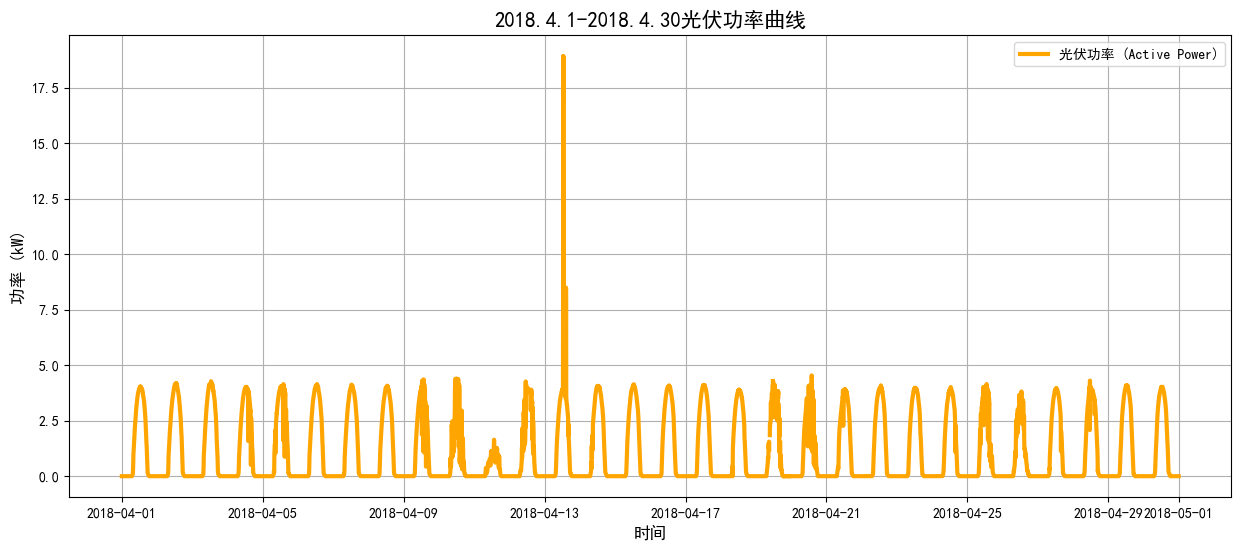

In [253]:
#绘制2018.4.1-4.30的光伏功率图
#可初步通过画图法发现4.13日存在明显的功率异常点

import matplotlib.pyplot as plt #处理绘图核心库

# 设置字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

# 将 timestamp 列转换为日期时间格式
df['timestamp'] = pd.to_datetime(df['timestamp'])

# 绘图
plt.figure(figsize=(15, 6))
plt.plot(df['timestamp'], df['Active_Power'], color='orange', linewidth=3, label='光伏功率 (Active Power)')

# 添加图表信息
plt.title('2018.4.1-2018.4.30光伏功率曲线', fontsize=15)
plt.xlabel('时间', fontsize=12)
plt.ylabel('功率 (kW)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


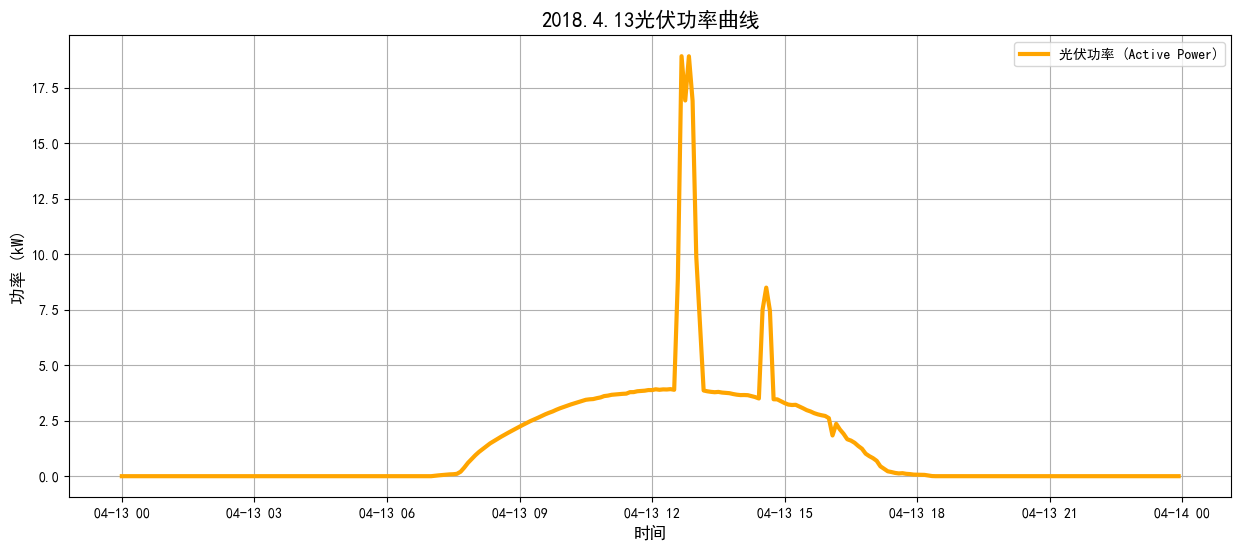

In [254]:
#绘制2018.4.13光伏功率图
#下面以4.13为例介绍详细的异常值检测方法

import matplotlib.pyplot as plt #处理绘图核心库

# 设置字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

# 将 timestamp 列转换为日期时间格式
df['timestamp'] = pd.to_datetime(df['timestamp'])

# 筛选2018年4月1日到2018年4月3日的数据
mask = (df['timestamp'] >= '2018-04-13') & (df['timestamp'] < '2018-04-14')
df_filtered = df.loc[mask]

# 绘图
plt.figure(figsize=(15, 6))
plt.plot(df_filtered['timestamp'], df_filtered['Active_Power'], color='orange', linewidth=3, label='光伏功率 (Active Power)')

# 添加图表信息
plt.title('2018.4.13光伏功率曲线', fontsize=15)
plt.xlabel('时间', fontsize=12)
plt.ylabel('功率 (kW)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

### 2.2.2 单变量异常值检验： 3σ原则

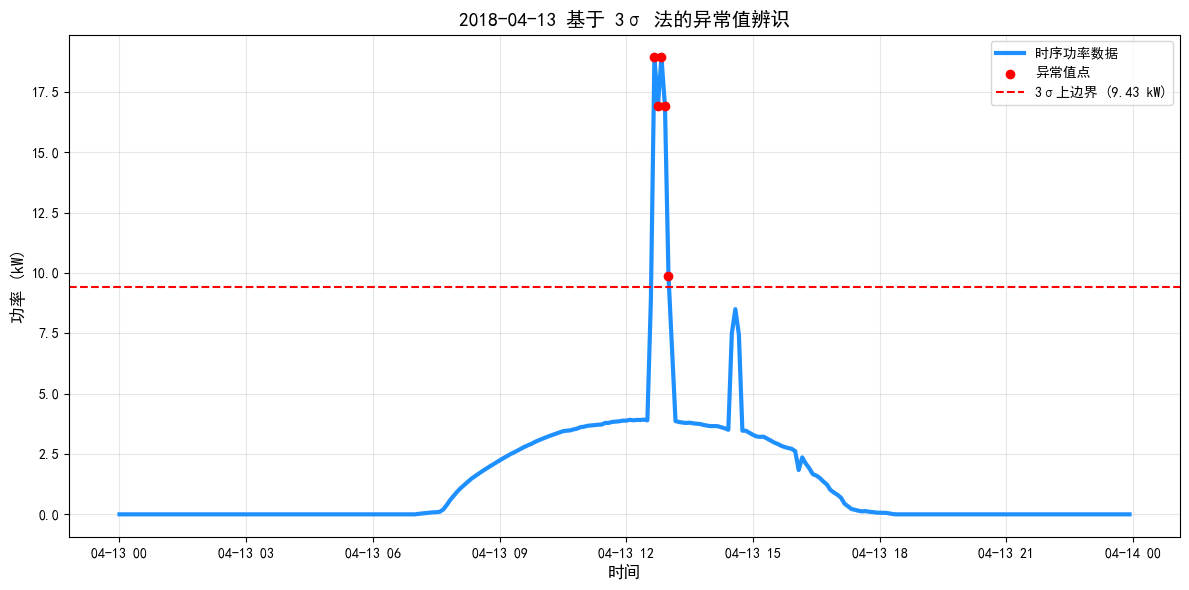

检测完成：4月13日共发现 5 个异常点。


In [255]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. 环境配置：解决中文显示
plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False

# 2. 读取数据并设置时间索引
df = pd.read_csv('绪论数据集-2018.4.1-4.30光伏数据集.csv', parse_dates=['timestamp'], index_col='timestamp')

# 3. 筛选 4月13日 的功率数据
target_day = '2018-04-13'
data_day = df.loc[target_day, 'Active_Power']

# 4. 3σ 法计算
mean = data_day.mean()      # 计算当日均值
std_dev = data_day.std()    # 计算当日标准差
upper_bound = mean + 3 * std_dev  # 计算上边界阈值

# 检测超出上边界的异常点
outliers = data_day[data_day > upper_bound]

# 5. 可视化
plt.figure(figsize=(12, 6))

# 绘制蓝色主曲线
plt.plot(data_day.index, data_day, label='时序功率数据', color='dodgerblue', linewidth=3)

# 标记红色异常点
if not outliers.empty:
    plt.scatter(outliers.index, outliers, color='red', label='异常值点', zorder=5)

# 绘制 3σ 红色虚线边界
plt.axhline(upper_bound, color='red', linestyle='--', label=f'3σ上边界 ({upper_bound:.2f} kW)')

# 图表美化
plt.title(f'{target_day} 基于 3σ 法的异常值辨识', fontsize=14)
plt.ylabel('功率 (kW)', fontsize=12)
plt.xlabel('时间', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# 打印检测结果
print(f"检测完成：4月13日共发现 {len(outliers)} 个异常点。")

### 2.2.3 单变量异常值检验： IQR法

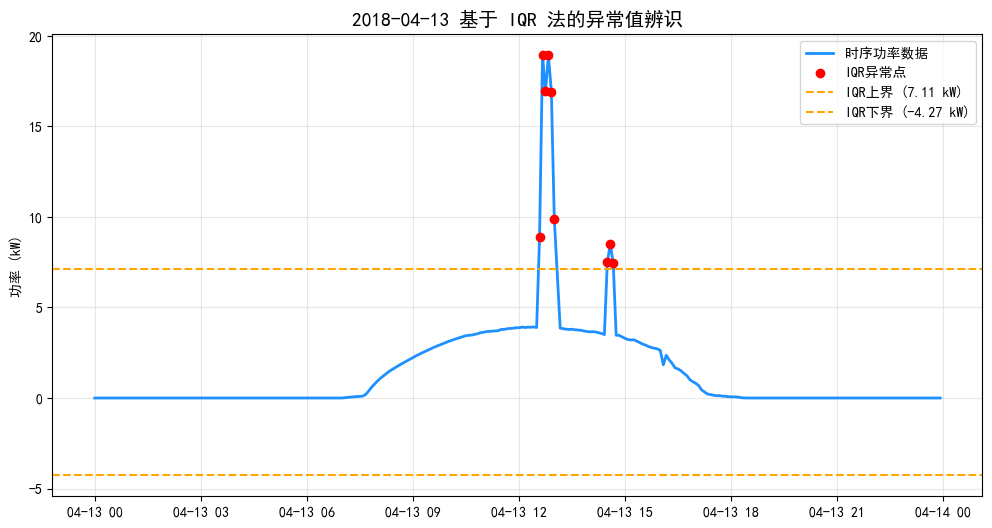

检测完成：4月13日通过 IQR 法共发现 9 个异常点。


In [256]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. 环境配置
plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False

# 2. 读取数据
df = pd.read_csv('绪论数据集-2018.4.1-4.30光伏数据集.csv', parse_dates=['timestamp'], index_col='timestamp')

# 3. 筛选 4月13日 的功率数据
target_day = '2018-04-13'
data_day = df.loc[target_day, 'Active_Power']

# 4. 【核心】：IQR 法计算阈值
Q1 = data_day.quantile(0.25)  # 第一四分位数 (25%)
Q3 = data_day.quantile(0.75)  # 第三四分位数 (75%)
IQR = Q3 - Q1                 # 四分位距

# 计算上下边界（通常系数取 1.5）
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 检测异常值 (超出上下边界的点)
outliers = data_day[(data_day > upper_bound) | (data_day < lower_bound)]

# 5. 可视化
plt.figure(figsize=(12, 6))

# 绘制时序功率数据
plt.plot(data_day.index, data_day, label='时序功率数据', color='dodgerblue', linewidth=2)

# 标记异常值点
if not outliers.empty:
    plt.scatter(outliers.index, outliers, color='red', label='IQR异常点', zorder=5)

# 绘制 IQR 上下边界线
plt.axhline(upper_bound, color='orange', linestyle='--', label=f'IQR上界 ({upper_bound:.2f} kW)')
plt.axhline(lower_bound, color='orange', linestyle='--', label=f'IQR下界 ({lower_bound:.2f} kW)')

# 图表装饰
plt.title(f'{target_day} 基于 IQR 法的异常值辨识', fontsize=14)
plt.ylabel('功率 (kW)')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

print(f"检测完成：4月13日通过 IQR 法共发现 {len(outliers)} 个异常点。")

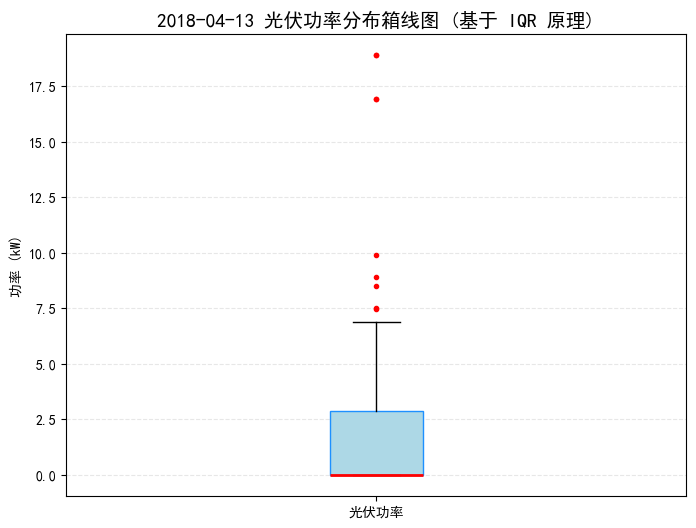

--- IQR 统计量 ---
第一四分位数 (Q1): 0.00
第三四分位数 (Q3): 2.84
四分位距 (IQR): 2.84
上边界 (Q3 + 1.5*IQR): 7.11


In [257]:
#箱线图绘制

import pandas as pd
import matplotlib.pyplot as plt

# 1. 环境配置
plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False

# 2. 读取数据
df = pd.read_csv('绪论数据集-2018.4.1-4.30光伏数据集.csv', parse_dates=['timestamp'], index_col='timestamp')

# 3. 筛选 4月13日 的功率数据
target_day = '2018-04-13'
data_day = df.loc[target_day, 'Active_Power'].dropna()

# 4. 可视化：绘制箱线图
plt.figure(figsize=(8, 6))

# patch_artist=True 允许填充颜色
# sym='r.' 表示异常值（Outliers）用红色点显示
plt.boxplot(data_day, tick_labels=['光伏功率'], sym='r.', patch_artist=True, 
            boxprops=dict(facecolor='lightblue', color='dodgerblue'), # 箱体颜色
            medianprops=dict(color='red', linewidth=2))             # 中位数线颜色

# 图表装饰
plt.title(f'{target_day} 光伏功率分布箱线图 (基于 IQR 原理)', fontsize=14)
plt.ylabel('功率 (kW)')
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.show()

# 5. 打印关键统计量（这些数值决定了图中箱子的位置和胡须的长度）
Q1 = data_day.quantile(0.25)
Q3 = data_day.quantile(0.75)
IQR = Q3 - Q1
print(f"--- IQR 统计量 ---")
print(f"第一四分位数 (Q1): {Q1:.2f}")
print(f"第三四分位数 (Q3): {Q3:.2f}")
print(f"四分位距 (IQR): {IQR:.2f}")
print(f"上边界 (Q3 + 1.5*IQR): {Q3 + 1.5*IQR:.2f}")

### 2.2.4 多变量异常值检验： One-Class SVM

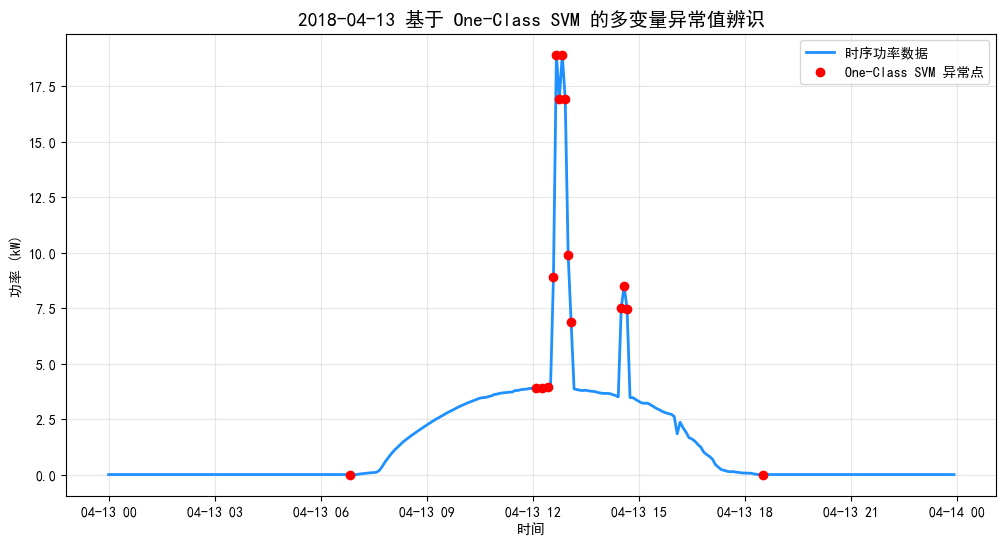

检测完成：4月13日通过 One-Class SVM 共发现 15 个异常点。


In [258]:
# 先使用单变量（功率）进行异常值检验

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler

# 1. 环境配置
plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False

# 2. 读取数据
df = pd.read_csv('绪论数据集-2018.4.1-4.30光伏数据集.csv', parse_dates=['timestamp'], index_col='timestamp')

# 3. 筛选 4月13日 的多变量数据
target_day = '2018-04-13'
# 选取单变量进行分析：功率 
features = ['Active_Power']
data_day = df.loc[target_day, features].dropna() # 确保没有缺失值

# 4. 【核心】：One-Class SVM 异常检测
# 第一步：标准化（SVM 对数据量纲敏感，将不同单位的数据缩放到同一范围）
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_day)

# 第二步：创建并训练模型
# nu 代表异常点的比例期望值（0.1 表示约 10% 的点可能被判定为异常）（可调节此处参数）
# kernel="rbf" 是一种常用的非线性核函数
model = OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
results = model.fit_predict(data_scaled)

# 第三步：提取异常值 (模型返回 -1 表示异常，1 表示正常)
outliers = data_day[results == -1]

# 5. 可视化
plt.figure(figsize=(12, 6))

# 绘制时序功率数据
plt.plot(data_day.index, data_day['Active_Power'], label='时序功率数据', color='dodgerblue', linewidth=2)

# 标记异常点
if not outliers.empty:
    plt.scatter(outliers.index, outliers['Active_Power'], color='red', label='One-Class SVM 异常点', zorder=5)

# 图表装饰
plt.title(f'{target_day} 基于 One-Class SVM 的多变量异常值辨识', fontsize=14)
plt.xlabel('时间')
plt.ylabel('功率 (kW)')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

print(f"检测完成：4月13日通过 One-Class SVM 共发现 {len(outliers)} 个异常点。")

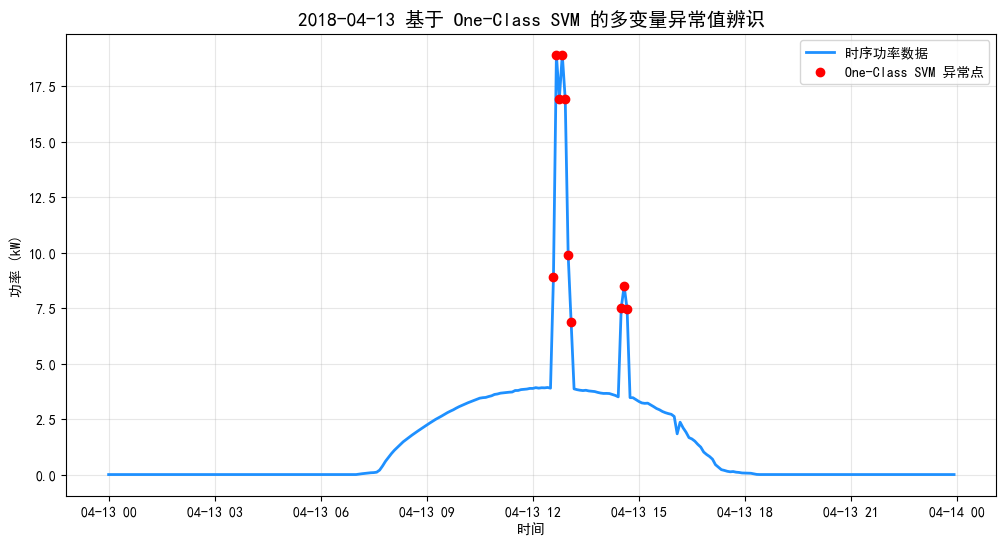

检测完成：4月13日通过 One-Class SVM 共发现 10 个异常点。


In [259]:
# 再使用单变量（功率+时间特征）进行异常值检验

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler

# 1. 环境配置
plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False

# 2. 读取数据
df = pd.read_csv('绪论数据集-2018.4.1-4.30光伏数据集.csv', parse_dates=['timestamp'], index_col='timestamp')
df['hour'] = df.index.hour

# 3. 筛选 4月13日 的多变量数据
target_day = '2018-04-13'
# 选取两个关键变量进行多变量分析：功率 + 小时数
features = ['Active_Power', 'hour']
data_day = df.loc[target_day, features].dropna() # 确保没有缺失值

# 4. 【核心】：One-Class SVM 异常检测
# 第一步：标准化（SVM 对数据量纲敏感，将不同单位的数据缩放到同一范围）
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_day)

# 第二步：创建并训练模型
# nu 代表异常点的比例期望值（0.1 表示约 10% 的点可能被判定为异常）（可调节此处参数）
# kernel="rbf" 是一种常用的非线性核函数
model = OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
results = model.fit_predict(data_scaled)

# 第三步：提取异常值 (模型返回 -1 表示异常，1 表示正常)
outliers = data_day[results == -1]

# 5. 可视化
plt.figure(figsize=(12, 6))

# 绘制时序功率数据
plt.plot(data_day.index, data_day['Active_Power'], label='时序功率数据', color='dodgerblue', linewidth=2)

# 标记异常点
if not outliers.empty:
    plt.scatter(outliers.index, outliers['Active_Power'], color='red', label='One-Class SVM 异常点', zorder=5)

# 图表装饰
plt.title(f'{target_day} 基于 One-Class SVM 的多变量异常值辨识', fontsize=14)
plt.xlabel('时间')
plt.ylabel('功率 (kW)')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

print(f"检测完成：4月13日通过 One-Class SVM 共发现 {len(outliers)} 个异常点。")

### 2.2.5 DBSCAN异常值检验

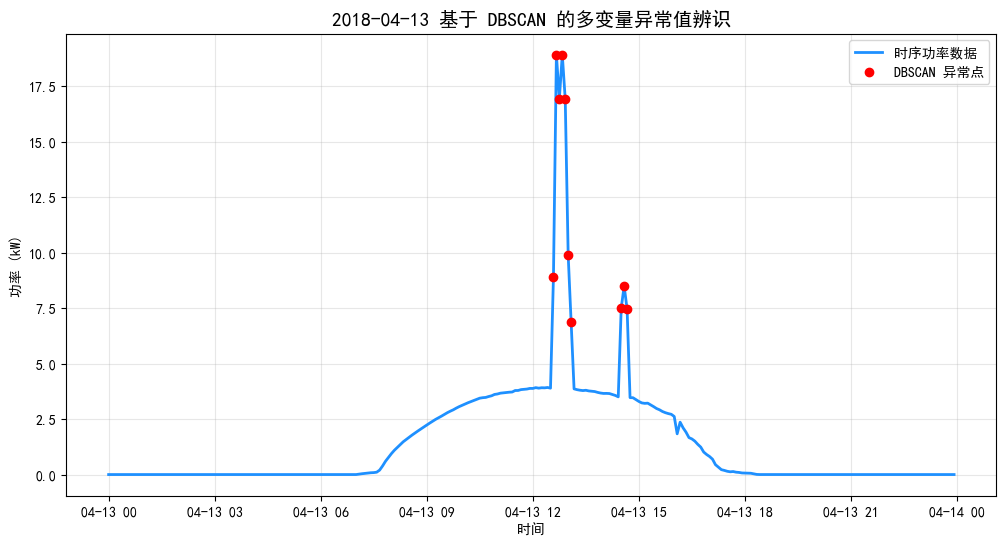

检测完成：4月13日通过 DBSCAN 共发现 10 个异常点。


In [260]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# 1. 环境配置
plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False

# 2. 读取数据
df = pd.read_csv('绪论数据集-2018.4.1-4.30光伏数据集.csv', parse_dates=['timestamp'], index_col='timestamp')

# 3. 筛选 4月13日 的功率数据
target_day = '2018-04-13'
features = ['Active_Power']
data_day = df.loc[target_day, features].dropna()

# 4. 【核心】：DBSCAN 异常值检验
# 第一步：标准化（DBSCAN 基于距离计算，消除量纲影响）
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_day)

# 第二步：训练 DBSCAN 模型
# eps (epsilon): 邻域半径，决定了点与点之间多近算“邻居”
# min_samples: 成为核心点所需的最少邻居数
# 这两个参数共同定义了“密度”
model = DBSCAN(eps=0.5, min_samples=5)
labels = model.fit_predict(data_scaled)

# 第三步：提取异常点 (标签为 -1 的点被 DBSCAN 视为噪声/离群值)
outliers = data_day[labels == -1]

# 5. 可视化
plt.figure(figsize=(12, 6))

# 绘制时序功率数据
plt.plot(data_day.index, data_day['Active_Power'], label='时序功率数据', color='dodgerblue', linewidth=2)

# 标记异常值点 (使用红色三角形 marker='^')
if not outliers.empty:
    plt.scatter(outliers.index, outliers['Active_Power'], color='red', label='DBSCAN 异常点', zorder=5)

# 图表装饰
plt.title(f'{target_day} 基于 DBSCAN 的多变量异常值辨识', fontsize=14)
plt.xlabel('时间')
plt.ylabel('功率 (kW)')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

print(f"检测完成：4月13日通过 DBSCAN 共发现 {len(outliers)} 个异常点。")

## 2.3 对数据集进行最终异常值检测和缺失值填充，生成新的数据集

数据清洗完成！
1. 负功率已归零；
2. 已通过 DBSCAN 剔除功率异常点；
3. 已对所有列完成局部平均值（前后5点）插补。
保存路径：绪论数据集-2018.4.1-4.30光伏数据集-已清洗.csv


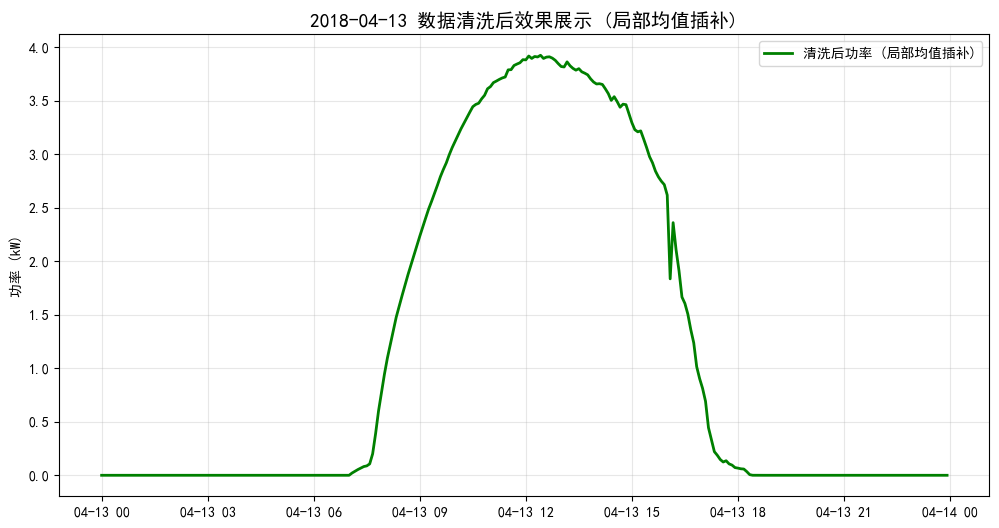

In [261]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# 1. 环境配置
plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False

# 2. 读取数据
df = pd.read_csv('绪论数据集-2018.4.1-4.30光伏数据集.csv', parse_dates=['timestamp'], index_col='timestamp')

# --- 任务 1：功率值小于 0 的置为 0 ---
df['Active_Power'] = df['Active_Power'].clip(lower=0)

# --- 任务 2：功率值异常值检测 (DBSCAN) ---
# 临时填充全局均值以便进行标准化和模型计算
temp_power = df[['Active_Power']].fillna(df['Active_Power'].mean())
scaler = StandardScaler()
data_scaled = scaler.fit_transform(temp_power)

model = DBSCAN(eps=0.3, min_samples=10)
labels = model.fit_predict(data_scaled)

# 将检测到的异常点标记为 NaN，等待插补
df.loc[labels == -1, 'Active_Power'] = np.nan

# --- 任务 3：【核心】局部滑动平均值插补 ---
# 遍历每一列（功率、温度、湿度、辐照度等）
for col in df.columns:
    # 计算局部平均值：取当前点前后各5个点（窗口大小11），居中计算
    local_mean = df[col].rolling(window=11, center=True, min_periods=1).mean()
    
    # 用对应的局部平均值填充该列的空缺（NaN）
    df[col] = df[col].fillna(local_mean)
    
    # 保底操作：如果窗口内全是空值，则用该列全局均值填充极少数剩余空隙
    df[col] = df[col].fillna(df[col].mean())

# 4. 导出清洗后的数据集
output_name = '绪论数据集-2018.4.1-4.30光伏数据集-已清洗.csv'
df.to_csv(output_name)

print(f"数据清洗完成！")
print(f"1. 负功率已归零；")
print(f"2. 已通过 DBSCAN 剔除功率异常点；")
print(f"3. 已对所有列完成局部平均值（前后5点）插补。")
print(f"保存路径：{output_name}")

# 5. 可视化演示 (以 4月13日 为例查看清洗后的功率曲线)
plt.figure(figsize=(12, 6))
data_day = df.loc['2018-04-13', 'Active_Power']
plt.plot(data_day.index, data_day, label='清洗后功率 (局部均值插补)', color='green', linewidth=2)
plt.title('2018-04-13 数据清洗后效果展示 (局部均值插补)', fontsize=14)
plt.ylabel('功率 (kW)')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# 3 数据转换

## 3.1 标准化/归一化

In [262]:
# 以Min-Max归一化为例，对数据集进行进一步操作，生成新的归一化后数据集

import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# 1. 读取清洗后的数据
df = pd.read_csv('绪论数据集-2018.4.1-4.30光伏数据集-已清洗.csv', parse_dates=['timestamp'], index_col='timestamp')

# 2. 初始化 MinMaxScaler
scaler = MinMaxScaler()

# 3. 执行归一化
# scaler.fit_transform 会计算每列的极值并完成转换
df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)

# 4. 保存为新的 CSV 文件
output_name = '绪论数据集-2018.4.1-4.30光伏数据集-已归一化.csv'
df_normalized.to_csv(output_name)

print(f"归一化处理完成，结果已保存至：{output_name}")

归一化处理完成，结果已保存至：绪论数据集-2018.4.1-4.30光伏数据集-已归一化.csv


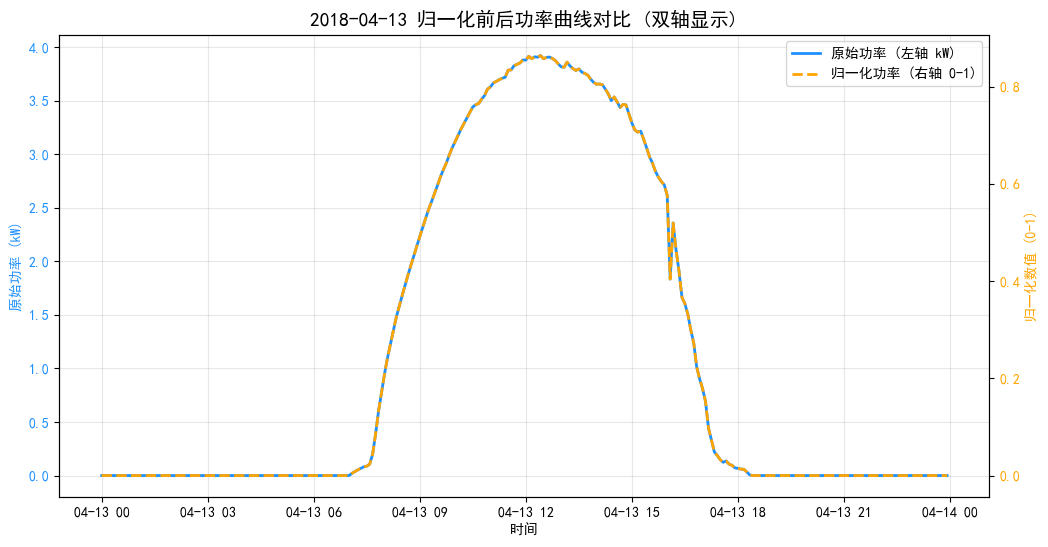

In [263]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# 1. 环境配置
plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False

# 2. 读取已清洗的数据
df_cleaned = pd.read_csv('绪论数据集-2018.4.1-4.30光伏数据集-已清洗.csv', parse_dates=['timestamp'], index_col='timestamp')

# 3. 归一化处理
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df_cleaned), columns=df_cleaned.columns, index=df_cleaned.index)

# 4. 选取一天的数据
target_day = '2018-04-13'
data_unnorm = df_cleaned.loc[target_day, 'Active_Power']
data_norm = df_normalized.loc[target_day, 'Active_Power']

# 5. 可视化：使用双 Y 轴
fig, ax1 = plt.subplots(figsize=(12, 6))

# --- 绘制左轴：原始功率 (实线) ---
line1 = ax1.plot(data_unnorm.index, data_unnorm, color='dodgerblue', label='原始功率 (左轴 kW)', linewidth=2)
ax1.set_xlabel('时间')
ax1.set_ylabel('原始功率 (kW)', color='dodgerblue')
ax1.tick_params(axis='y', labelcolor='dodgerblue')

# --- 绘制右轴：归一化功率 (虚线) ---
ax2 = ax1.twinx() # 创建共享 X 轴的第二个 Y 轴
line2 = ax2.plot(data_norm.index, data_norm, color='orange', linestyle='--', label='归一化功率 (右轴 0-1)', linewidth=2)
ax2.set_ylabel('归一化数值 (0-1)', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# --- 合并显示图例 ---
lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper right')

plt.title(f'{target_day} 归一化前后功率曲线对比 (双轴显示)', fontsize=14)
ax1.grid(alpha=0.3)
plt.show()

## 3.2 编码

In [264]:
# 此处以功率为例，按功率值大小进行独热编码

import pandas as pd
import numpy as np

# 1. 读取清洗后的数据
df = pd.read_csv('绪论数据集-2018.4.1-4.30光伏数据集-已清洗.csv', parse_dates=['timestamp'], index_col='timestamp')

# 2. 根据功率值的范围定义分类条件
conditions = [
    (df['Active_Power'] < 1),                             # 第一类：功率 < 1
    (df['Active_Power'] >= 1) & (df['Active_Power'] < 3), # 第二类：1 <= 功率 < 3
    (df['Active_Power'] >= 3) & (df['Active_Power'] < 4), # 第三类：3 <= 功率 < 4
    (df['Active_Power'] >= 4)                             # 第四类：功率 >= 4
]

# 3. 对应的编码值 (手动构造的独热码形式)
encoded_values = ['0001', '0010', '0100', '1000']

# 4. 使用 np.select() 生成新的编码列
# default='未知' 用于处理不符合上述所有条件的情况
df['功率编码'] = np.select(conditions, encoded_values, default='未知')

# 5. 打印结果进行核对
print(df[['Active_Power', '功率编码']].iloc[80:120])

                     Active_Power  功率编码
timestamp                              
2018-04-01 06:40:00      0.000000  0001
2018-04-01 06:45:00      0.000000  0001
2018-04-01 06:50:00      0.000000  0001
2018-04-01 06:55:00      0.000000  0001
2018-04-01 07:00:00      0.019567  0001
2018-04-01 07:05:00      0.030567  0001
2018-04-01 07:10:00      0.043967  0001
2018-04-01 07:15:00      0.057167  0001
2018-04-01 07:20:00      0.069200  0001
2018-04-01 07:25:00      0.078967  0001
2018-04-01 07:30:00      0.098600  0001
2018-04-01 07:35:00      0.234700  0001
2018-04-01 07:40:00      0.347233  0001
2018-04-01 07:45:00      0.655400  0001
2018-04-01 07:50:00      0.903300  0001
2018-04-01 07:55:00      1.012833  0010
2018-04-01 08:00:00      1.121167  0010
2018-04-01 08:05:00      1.228400  0010
2018-04-01 08:10:00      1.335500  0010
2018-04-01 08:15:00      1.440200  0010
2018-04-01 08:20:00      1.542267  0010
2018-04-01 08:25:00      1.642333  0010
2018-04-01 08:30:00      1.741200  0010


# 4 特征工程

## 4.1 特征相关性分析

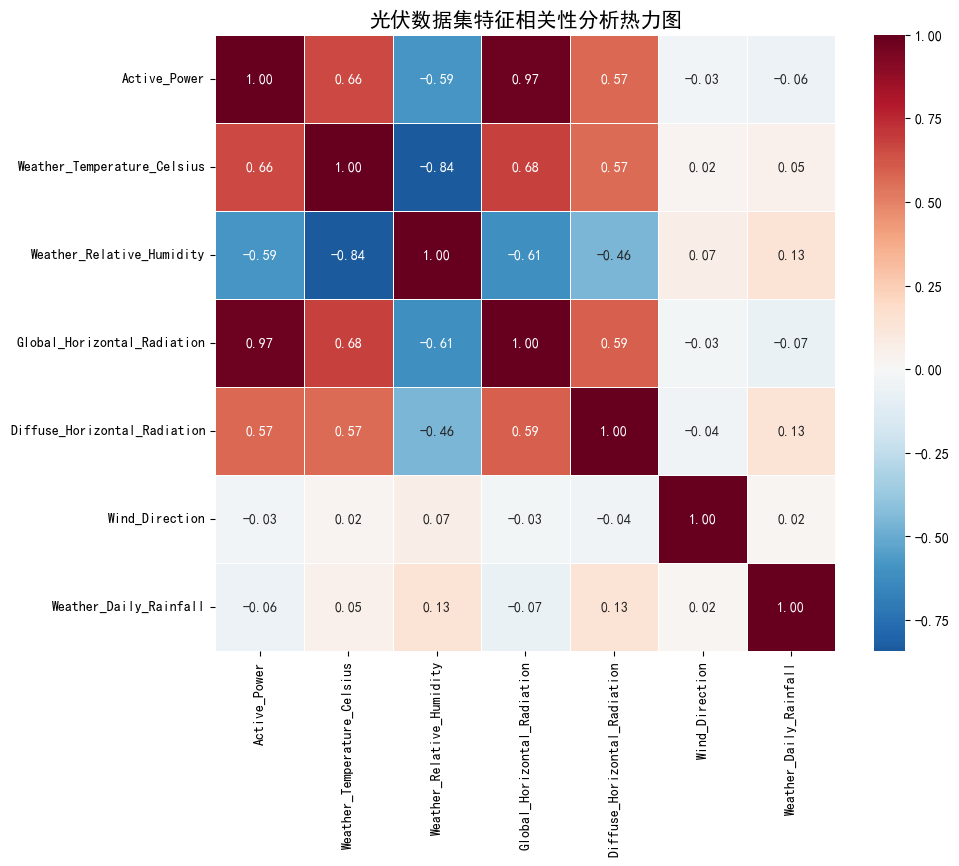

In [265]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 环境配置
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 2. 读取数据
df = pd.read_csv('绪论数据集-2018.4.1-4.30光伏数据集.csv', parse_dates=['timestamp'], index_col='timestamp')

# 3. 计算 Pearson 相关性矩阵
corr_matrix = df.corr()

# 4. 绘制热力图
plt.figure(figsize=(10, 8))
# annot=True 显示数值, cmap 使用红蓝渐变, center=0 设 0 为中性色
sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r', center=0, fmt='.2f', linewidths=0.5)

plt.title('光伏数据集特征相关性分析热力图', fontsize=15)
plt.show()

## 4.2 特征构造

In [266]:
import pandas as pd
import numpy as np

# 1. 读取清洗后的数据
df = pd.read_csv('绪论数据集-2018.4.1-4.30光伏数据集-已清洗.csv', parse_dates=['timestamp'], index_col='timestamp')

# 2. 提取日期信息
df['日期'] = df.index.date

# 4. 【核心】：利用 groupby 计算每日统计特征
daily_stats = df.groupby('日期')['Active_Power'].agg(
    峰值='max',                # 每日最大功率
    谷值='min',                # 每日最小功率
    均值='mean'                # 每日平均功率
)

# 5. 计算峰谷比 (Peak-to-Valley Ratio)
# 峰谷比越大，说明当天功率波动越剧烈（如多云天气）
daily_stats['峰谷比'] = daily_stats['峰值'] / daily_stats['谷值']

# 6. 打印结果查看
print("每日功率统计特征：")
print(daily_stats.head(30))

每日功率统计特征：
                  峰值   谷值        均值  峰谷比
日期                                      
2018-04-01  4.039434  0.0  1.217130  inf
2018-04-02  4.194167  0.0  1.242412  inf
2018-04-03  4.277567  0.0  1.263631  inf
2018-04-04  4.028732  0.0  1.177485  inf
2018-04-05  4.150833  0.0  1.155449  inf
2018-04-06  4.148100  0.0  1.225265  inf
2018-04-07  4.123167  0.0  1.202532  inf
2018-04-08  4.078633  0.0  1.195799  inf
2018-04-09  4.362066  0.0  1.101532  inf
2018-04-10  4.401667  0.0  0.732260  inf
2018-04-11  1.643066  0.0  0.307949  inf
2018-04-12  4.268267  0.0  1.025620  inf
2018-04-13  3.922767  0.0  1.158219  inf
2018-04-14  4.072400  0.0  1.185594  inf
2018-04-15  4.141667  0.0  1.191178  inf
2018-04-16  4.091267  0.0  1.185572  inf
2018-04-17  4.114734  0.0  1.185813  inf
2018-04-18  3.906767  0.0  1.114449  inf
2018-04-19  4.285266  0.0  1.074124  inf
2018-04-20  4.541733  0.0  0.780207  inf
2018-04-21  3.917067  0.0  1.086601  inf
2018-04-22  4.092267  0.0  1.147879  inf
2018-0

In [267]:
#改进

import pandas as pd
import numpy as np

# 1. 读取清洗后的数据
df = pd.read_csv('绪论数据集-2018.4.1-4.30光伏数据集-已清洗.csv', parse_dates=['timestamp'], index_col='timestamp')

# 2. 提取日期和小时信息
df['日期'] = df.index.date
df['小时'] = df.index.hour

# 3. 筛选每天 8:00 到 16:00 之间的数据
# 这样可以避开夜间零值，使谷值和峰谷比更有意义
df_filtered = df[(df['小时'] >= 8) & (df['小时'] <= 16)]

# 4. 【核心】：利用 groupby 计算每日统计特征
daily_stats = df_filtered.groupby('日期')['Active_Power'].agg(
    峰值='max',                # 每日最大功率
    谷值='min',                # 每日最小功率
    均值='mean'                # 每日平均功率
)

# 5. 计算峰谷比 (Peak-to-Valley Ratio)
# 峰谷比越大，说明当天功率波动越剧烈（如多云天气）
daily_stats['峰谷比'] = daily_stats['峰值'] / daily_stats['谷值']

# 6. 打印结果查看
print("每日功率统计特征（8:00-16:00 时段）：")
print(daily_stats.head(30))

每日功率统计特征（8:00-16:00 时段）：
                  峰值        谷值        均值        峰谷比
日期                                                 
2018-04-01  4.039434  1.121167  3.159110   3.602885
2018-04-02  4.194167  1.127767  3.222693   3.719002
2018-04-03  4.277567  1.142100  3.285354   3.745352
2018-04-04  4.028732  0.505367  3.058910   7.971899
2018-04-05  4.150833  0.873467  3.003481   4.752137
2018-04-06  4.148100  1.127800  3.190915   3.678046
2018-04-07  4.123167  1.108067  3.133835   3.721046
2018-04-08  4.078633  1.061100  3.121856   3.843778
2018-04-09  4.362066  0.428933  2.873497  10.169567
2018-04-10  4.401667  0.307667  1.915825  14.306609
2018-04-11  1.643066  0.123200  0.768593  13.336576
2018-04-12  4.268267  0.273533  2.687385  15.604191
2018-04-13  3.922767  0.902467  3.032897   4.346717
2018-04-14  4.072400  0.787733  3.107858   5.169769
2018-04-15  4.141667  0.715433  3.131665   5.789034
2018-04-16  4.091267  0.676033  3.118610   6.051871
2018-04-17  4.114734  0.667100  3.12400

# 5 数据集划分

In [1]:
#数据集划分：70% 训练集，15% 验证集，15% 测试集

import pandas as pd

# 1. 读取归一化后的数据
df = pd.read_csv('绪论数据集-2018.4.1-4.30光伏数据集-已归一化.csv', parse_dates=['timestamp'], index_col='timestamp')

# 2. 提取日期信息
df['日期'] = df.index.date

# 3. 获取并排序唯一日期列表（确保按时间先后顺序划分）
dates = sorted(df['日期'].unique())

# 4. 计算划分界限：70% 训练集，15% 验证集，15% 测试集
train_size = int(len(dates) * 0.7)
val_size = int(len(dates) * 0.15)

# 5. 按照计算出的索引划分日期区间
train_dates = dates[:train_size]                              # 前 21 天
val_dates = dates[train_size : train_size + val_size]         # 中间 4 天
test_dates = dates[train_size + val_size :]                   # 最后 5 天

# 6. 根据日期提取对应的完整数据，并删掉辅助用的“日期”列
train_data = df[df['日期'].isin(train_dates)].drop(columns=['日期'])
val_data = df[df['日期'].isin(val_dates)].drop(columns=['日期'])
test_data = df[df['日期'].isin(test_dates)].drop(columns=['日期'])

# 7. 打印划分结果，方便核对
print(f"数据集划分完成：")
print(f"训练集: {train_data.shape[0]} 行 (涵盖日期: {train_dates[0]} 至 {train_dates[-1]})")
print(f"验证集: {val_data.shape[0]} 行 (涵盖日期: {val_dates[0]} 至 {val_dates[-1]})")
print(f"测试集: {test_data.shape[0]} 行 (涵盖日期: {test_dates[0]} 至 {test_dates[-1]})")

# 8. (可选) 保存划分后的结果
train_data.to_csv('train_data.csv')
val_data.to_csv('val_data.csv')
test_data.to_csv('test_data.csv')

数据集划分完成：
训练集: 6048 行 (涵盖日期: 2018-04-01 至 2018-04-21)
验证集: 1152 行 (涵盖日期: 2018-04-22 至 2018-04-25)
测试集: 1440 行 (涵盖日期: 2018-04-26 至 2018-04-30)


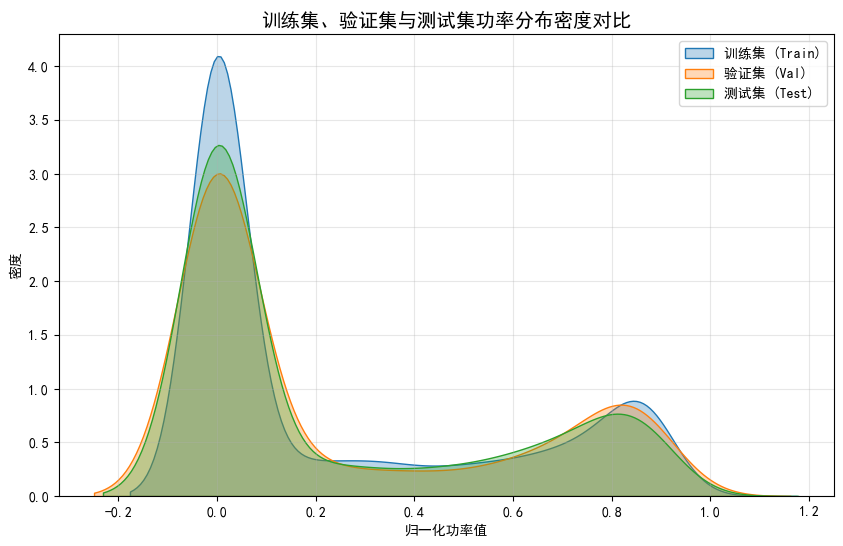

In [269]:
# 检验数据集划分合理性

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 环境配置
plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False

# 2. 读取归一化后的数据
df = pd.read_csv('绪论数据集-2018.4.1-4.30光伏数据集-已归一化.csv', parse_dates=['timestamp'], index_col='timestamp')

# 3. 按照之前的逻辑进行数据集划分
df['日期'] = df.index.date
dates = sorted(df['日期'].unique())
train_size = int(len(dates) * 0.7)
val_size = int(len(dates) * 0.15)

train_data = df[df['日期'].isin(dates[:train_size])]
val_data = df[df['日期'].isin(dates[train_size:train_size + val_size])]
test_data = df[df['日期'].isin(dates[train_size + val_size:])]

# 4. 【核心】：绘制功率数据的密度曲线 (KDE)
plt.figure(figsize=(10, 6))

# 使用 seaborn 绘制三个集合的核密度估计图
sns.kdeplot(train_data['Active_Power'], label='训练集 (Train)', fill=True, alpha=0.3)
sns.kdeplot(val_data['Active_Power'], label='验证集 (Val)', fill=True, alpha=0.3)
sns.kdeplot(test_data['Active_Power'], label='测试集 (Test)', fill=True, alpha=0.3)

# 图表装饰
plt.title('训练集、验证集与测试集功率分布密度对比', fontsize=14)
plt.xlabel('归一化功率值')
plt.ylabel('密度')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# 6 模型选择

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. 环境配置：设置中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 2. 直接从 CSV 文件导入划分好的数据集
train_df = pd.read_csv('train_data.csv', parse_dates=['timestamp'], index_col='timestamp')
val_df = pd.read_csv('val_data.csv', parse_dates=['timestamp'], index_col='timestamp')
test_df = pd.read_csv('test_data.csv', parse_dates=['timestamp'], index_col='timestamp')

# 3. 定义特征 (x) 与 目标 (y)
# 我们将 4 个核心气象特征映射到数学符号 x1, x2, x3, x4
def extract_xy(data):
    x1 = data['Weather_Temperature_Celsius'].values    # 温度
    x2 = data['Weather_Relative_Humidity'].values      # 湿度
    x3 = data['Global_Horizontal_Radiation'].values    # 总辐射
    x4 = data['Diffuse_Horizontal_Radiation'].values   # 散射辐射
    
    # 组合成特征矩阵 X
    X = np.column_stack((x1, x2, x3, x4))
    # 目标变量 y (光伏功率)
    y = data['Active_Power'].values
    return X, y

# 提取训练集和验证集数据
X_train, y_train = extract_xy(train_df)
X_val, y_val = extract_xy(val_df)

# 4. 打印核对
print("--- 数据导入成功 ---")
print(f"训练集特征矩阵 X_train 形状: {X_train.shape} (样本数, 特征数)")
print(f"验证集特征矩阵 X_val 形状: {X_val.shape}")
print(f"\n模型公式定义: y = w1*x1 + w2*x2 + w3*x3 + w4*x4 + b")
print(f"其中: x1=温度, x2=湿度, x3=总辐射, x4=散射辐射, y=输出功率")

--- 数据导入成功 ---
训练集特征矩阵 X_train 形状: (6048, 4) (样本数, 特征数)
验证集特征矩阵 X_val 形状: (1152, 4)

模型公式定义: y = w1*x1 + w2*x2 + w3*x3 + w4*x4 + b
其中: x1=温度, x2=湿度, x3=总辐射, x4=散射辐射, y=输出功率


# 7 定义损失函数

In [4]:
# 定义损失函数

import numpy as np

def get_mse(y_true, y_pred):
    """
    均方误差 (MSE)
    y_true: 真实值 
    y_pred: 预测值 
    """
    return np.mean((y_true - y_pred)**2)

def get_rmse(y_true, y_pred):
    """均方根误差 (RMSE)"""
    return np.sqrt(get_mse(y_true, y_pred))

# 举例演示：假设真实值是 1.0，模型预测是 0.8
test_true = np.array([1.0])
test_pred = np.array([0.8])
print(f"预测误差为 0.2 时，MSE: {get_mse(test_true, test_pred):.4f}, RMSE: {get_rmse(test_true, test_pred):.4f}")

预测误差为 0.2 时，MSE: 0.0400, RMSE: 0.2000


# 8 参数优化

## 8.1 梯度下降

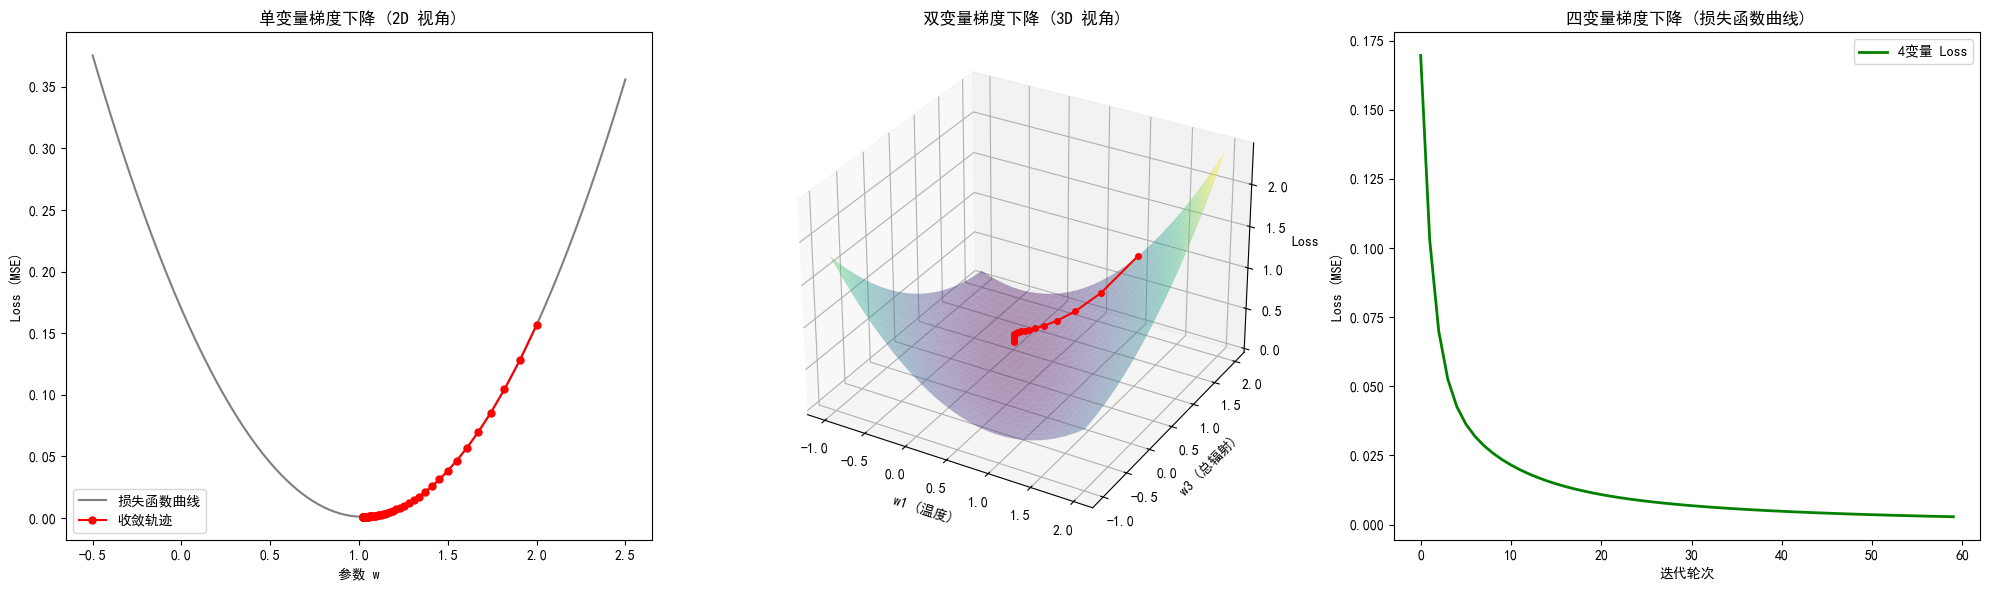

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 1. 环境配置
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 2. 读取您上传的数据集
train_df = pd.read_csv('train_data.csv', parse_dates=['timestamp'], index_col='timestamp')

# 定义符号映射 (x1-x4, y)
x1 = train_df['Weather_Temperature_Celsius'].values   # 温度
x2 = train_df['Weather_Relative_Humidity'].values     # 湿度
x3 = train_df['Global_Horizontal_Radiation'].values   # 总辐射
x4 = train_df['Diffuse_Horizontal_Radiation'].values  # 散射辐射
y = train_df['Active_Power'].values

# ==========================================
# 逻辑一：单变量梯度下降 (x3 -> y)
# ==========================================
def gd_1var(x, y, w_init, lr, epochs):
    w = w_init
    hist = []
    for _ in range(epochs):
        loss = np.mean((w * x - y)**2)
        hist.append((w, loss))
        grad = np.mean(2 * (w * x - y) * x) # 损失函数对 w 的导数
        w -= lr * grad
    return hist

# ==========================================
# 逻辑二：双变量梯度下降 (x1, x3 -> y)
# ==========================================
def gd_2var(xa, xb, y, w_init, lr, epochs):
    w = np.array(w_init, dtype=float)
    hist = []
    for _ in range(epochs):
        y_pred = w[0]*xa + w[1]*xb
        loss = np.mean((y_pred - y)**2)
        hist.append((w[0], w[1], loss))
        # 分别对 w1 和 w2 求偏导
        grad1 = np.mean(2 * (y_pred - y) * xa)
        grad2 = np.mean(2 * (y_pred - y) * xb)
        w[0] -= lr * grad1
        w[1] -= lr * grad2
    return hist

# ==========================================
# 逻辑三：四变量梯度下降 (x1, x2, x3, x4 -> y)
# ==========================================
X4 = np.column_stack((x1, x2, x3, x4))
def gd_4var(X, y, lr, epochs):
    n_samples, n_features = X.shape
    w = np.zeros(n_features)
    loss_hist = []
    for _ in range(epochs):
        y_pred = X @ w
        loss = np.mean((y_pred - y)**2)
        loss_hist.append(loss)
        grad = (2 / n_samples) * X.T @ (y_pred - y) # 矩阵形式的梯度
        w -= lr * grad
    return loss_hist

# --- 运行计算 ---
hist1 = gd_1var(x3, y, w_init=2.0, lr=0.3, epochs=60)
hist2 = gd_2var(x1, x3, y, w_init=[1.0, 2.0], lr=0.3, epochs=60)
loss_hist4 = gd_4var(X4, y, lr=0.3, epochs=60)

# ==========================================
# 绘图演示 (三个子图)
# ==========================================
fig = plt.figure(figsize=(20, 6))

# 图 1：单变量 (2D 视角)
ax1 = fig.add_subplot(1, 3, 1)
w_range = np.linspace(-0.5, 2.5, 100)
loss_surface_1 = [np.mean((wi * x3 - y)**2) for wi in w_range]
ax1.plot(w_range, loss_surface_1, 'k-', alpha=0.5, label='损失函数曲线')
ax1.plot([h[0] for h in hist1], [h[1] for h in hist1], 'ro-', markersize=5, label='收敛轨迹')
ax1.set_title('单变量梯度下降 (2D 视角)')
ax1.set_xlabel('参数 w')
ax1.set_ylabel('Loss (MSE)')
ax1.legend()

# 图 2：双变量 (3D 视角)
ax2 = fig.add_subplot(1, 3, 2, projection='3d')
w1_grid = np.linspace(-1, 2, 30)
w2_grid = np.linspace(-1, 2, 30)
W1, W2 = np.meshgrid(w1_grid, w2_grid)
# 计算曲面的 Loss 值
Z = np.array([[np.mean((w1*x1 + w2*x3 - y)**2) for w1 in w1_grid] for w2 in w2_grid])
ax2.plot_surface(W1, W2, Z, cmap='viridis', alpha=0.4)
# 绘制 3D 轨迹
ax2.plot([h[0] for h in hist2], [h[1] for h in hist2], [h[2] for h in hist2], 
         'r.-', markersize=8, label='收敛轨迹', zorder=10)
ax2.set_title('双变量梯度下降 (3D 视角)')
ax2.set_xlabel('w1 (温度)')
ax2.set_ylabel('w3 (总辐射)')
ax2.set_zlabel('Loss')

# 图 3：四变量 (损失函数曲线)
ax3 = fig.add_subplot(1, 3, 3)
ax3.plot(range(len(loss_hist4)), loss_hist4, 'g-', linewidth=2, label='4变量 Loss')
ax3.set_title('四变量梯度下降 (损失函数曲线)')
ax3.set_xlabel('迭代轮次')
ax3.set_ylabel('Loss (MSE)')
ax3.legend()

plt.tight_layout()
plt.show()

--- 训练完成 ---
最终权重 w: [ 0.0479737  -0.02036537  0.95789468  0.08859633]
最终偏置 b: -0.0179


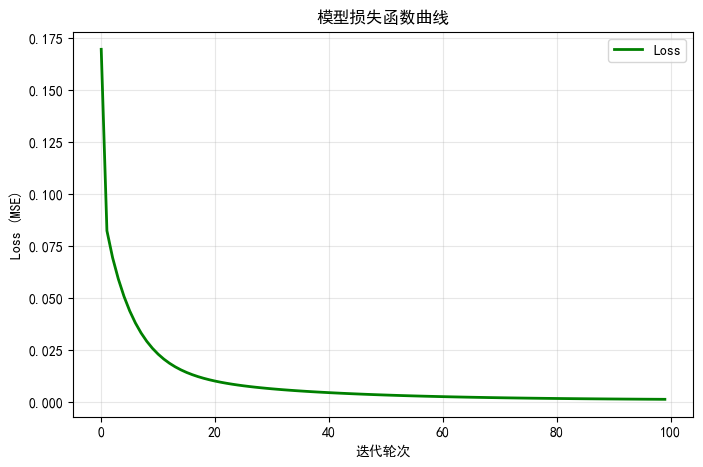

In [ ]:
# 梯度下降与反向传播全流程

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 1. 环境配置
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 2. 读取您上传的数据集
train_df = pd.read_csv('train_data.csv', parse_dates=['timestamp'], index_col='timestamp')

# 定义符号映射 (x1-x4, y)
x1 = train_df['Weather_Temperature_Celsius'].values   # 温度
x2 = train_df['Weather_Relative_Humidity'].values     # 湿度
x3 = train_df['Global_Horizontal_Radiation'].values   # 总辐射
x4 = train_df['Diffuse_Horizontal_Radiation'].values  # 散射辐射
y = train_df['Active_Power'].values

X4 = np.column_stack((x1, x2, x3, x4))

def gd_4var_with_b(X, y, lr, epochs):
    n_samples, n_features = X.shape
    # 初始化：4个权重设为0，1个偏置设为0
    w = np.zeros(n_features)
    b = 0.0
    loss_hist = []
    
    for i in range(epochs):
        # 1. 前向传播：预测值计算 (Xw + b)
        y_pred = np.dot(X, w) + b
        
        # 2. 计算当前损失 (MSE)
        loss = np.mean((y_pred - y)**2)
        loss_hist.append(loss)
        
        # 3. 反向传播：计算梯度
        # dw 的梯度计算 (矩阵形式)
        dw = (2 / n_samples) * np.dot(X.T, (y_pred - y))
        # db 的梯度计算 (误差的平均值)
        db = (2 / n_samples) * np.sum(y_pred - y)
        
        # 4. 参数更新
        w -= lr * dw
        b -= lr * db
        
    return w, b, loss_hist

# --- 运行计算 ---
final_w4, final_b, loss_hist4 = gd_4var_with_b(X4, y, lr=0.3, epochs=100)

print("--- 训练完成 ---")
print(f"最终权重 w: {final_w4}")
print(f"最终偏置 b: {final_b:.4f}")

# --- 绘图展示学习曲线 ---
plt.figure(figsize=(8, 5))
plt.plot(range(len(loss_hist4)), loss_hist4, 'g-', linewidth=2, label='Loss')
plt.title('模型损失函数曲线')
plt.xlabel('迭代轮次')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

## 8.2 学习率调整

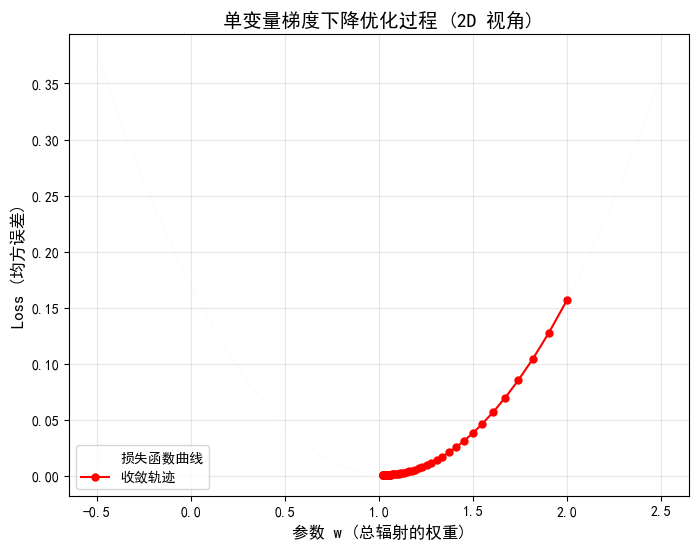

In [ ]:
# 正常学习率 lr=0.3

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. 环境配置
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 2. 读取之前划分好的训练集
train_df = pd.read_csv('train_data.csv', parse_dates=['timestamp'], index_col='timestamp')

# 3. 准备数据：选取总辐射 (x3) 作为特征，功率 (y) 作为目标
x3 = train_df['Global_Horizontal_Radiation'].values 
y = train_df['Active_Power'].values

# ==========================================
# 逻辑一：单变量梯度下降 (x3 -> y)
# ==========================================
def gd_1var(x, y, w_init, lr, epochs):
    w = w_init
    hist = []
    for _ in range(epochs):
        # 计算当前损失
        loss = np.mean((w * x - y)**2)
        hist.append((w, loss))
        # 计算梯度 (MSE 对 w 的导数)
        grad = np.mean(2 * (w * x - y) * x) 
        # 更新参数
        w -= lr * grad
    return hist

# 运行优化：从 w=2.0 开始
# 可以尝试修改 lr 或 epochs 来观察轨迹变化
hist1 = gd_1var(x3, y, w_init=2.0, lr=0.3, epochs=60)

# ==========================================
# 绘图演示 (单子图 2D 视角)
# ==========================================
plt.figure(figsize=(8, 6))

# 绘制背景：损失函数曲线 (抛物线)
w_range = np.linspace(-0.5, 2.5, 100)
loss_surface_1 = [np.mean((wi * x3 - y)**2) for wi in w_range]
plt.plot(w_range, loss_surface_1, 'k-', alpha=0.5, label='损失函数曲线')

# 绘制收敛轨迹：红点代表每一轮迭代的位置
w_pts = [h[0] for h in hist1]
l_pts = [h[1] for h in hist1]
plt.plot(w_pts, l_pts, 'ro-', markersize=5, label='收敛轨迹')


# 图表装饰
plt.title('单变量梯度下降优化过程 (2D 视角)', fontsize=14)
plt.xlabel('参数 w (总辐射的权重)', fontsize=12)
plt.ylabel('Loss (均方误差)', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)

plt.show()

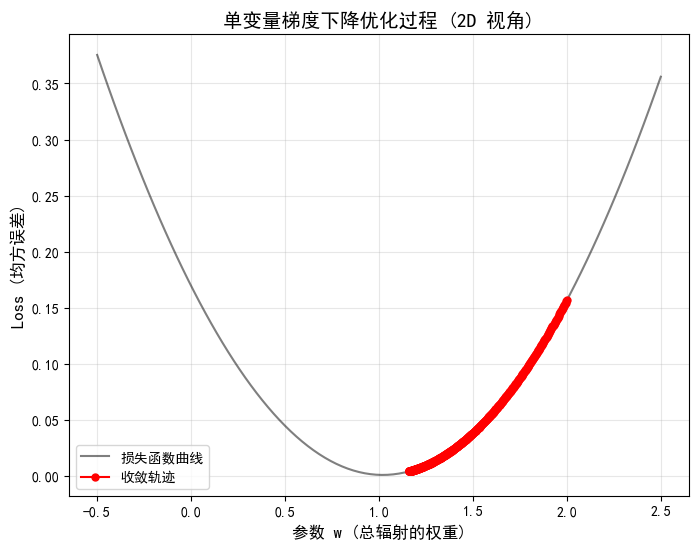

In [ ]:
# 学习率过小 lr=0.01

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. 环境配置
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 2. 读取之前划分好的训练集
train_df = pd.read_csv('train_data.csv', parse_dates=['timestamp'], index_col='timestamp')

# 3. 准备数据：选取总辐射 (x3) 作为特征，功率 (y) 作为目标
x3 = train_df['Global_Horizontal_Radiation'].values 
y = train_df['Active_Power'].values

# ==========================================
# 逻辑一：单变量梯度下降 (x3 -> y)
# ==========================================
def gd_1var(x, y, w_init, lr, epochs):
    w = w_init
    hist = []
    for _ in range(epochs):
        # 计算当前损失
        loss = np.mean((w * x - y)**2)
        hist.append((w, loss))
        # 计算梯度 (MSE 对 w 的导数)
        grad = np.mean(2 * (w * x - y) * x) 
        # 更新参数
        w -= lr * grad
    return hist

# 运行优化：从 w=2.0 开始
# 可以尝试修改 lr 或 epochs 来观察轨迹变化
hist1 = gd_1var(x3, y, w_init=2.0, lr=0.01, epochs=600)

# ==========================================
# 绘图演示 (单子图 2D 视角)
# ==========================================
plt.figure(figsize=(8, 6))

# 绘制背景：损失函数曲线 (抛物线)
w_range = np.linspace(-0.5, 2.5, 100)
loss_surface_1 = [np.mean((wi * x3 - y)**2) for wi in w_range]
plt.plot(w_range, loss_surface_1, 'k-', alpha=0.5, label='损失函数曲线')

# 绘制收敛轨迹：红点代表每一轮迭代的位置
w_pts = [h[0] for h in hist1]
l_pts = [h[1] for h in hist1]
plt.plot(w_pts, l_pts, 'ro-', markersize=5, label='收敛轨迹')


# 图表装饰
plt.title('单变量梯度下降优化过程 (2D 视角)', fontsize=14)
plt.xlabel('参数 w (总辐射的权重)', fontsize=12)
plt.ylabel('Loss (均方误差)', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)

plt.show()

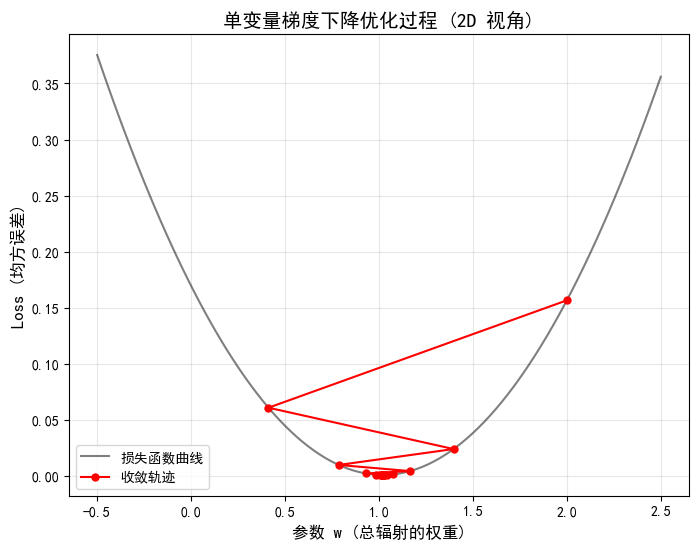

In [36]:
# 学习率过大 lr=5

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. 环境配置
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 2. 读取之前划分好的训练集
train_df = pd.read_csv('train_data.csv', parse_dates=['timestamp'], index_col='timestamp')

# 3. 准备数据：选取总辐射 (x3) 作为特征，功率 (y) 作为目标
x3 = train_df['Global_Horizontal_Radiation'].values 
y = train_df['Active_Power'].values

# ==========================================
# 逻辑一：单变量梯度下降 (x3 -> y)
# ==========================================
def gd_1var(x, y, w_init, lr, epochs):
    w = w_init
    hist = []
    for _ in range(epochs):
        # 计算当前损失
        loss = np.mean((w * x - y)**2)
        hist.append((w, loss))
        # 计算梯度 (MSE 对 w 的导数)
        grad = np.mean(2 * (w * x - y) * x) 
        # 更新参数
        w -= lr * grad
    return hist

# 运行优化：从 w=2.0 开始
# 可以尝试修改 lr 或 epochs 来观察轨迹变化
hist1 = gd_1var(x3, y, w_init=2.0, lr=5, epochs=60)

# ==========================================
# 绘图演示 (单子图 2D 视角)
# ==========================================
plt.figure(figsize=(8, 6))

# 绘制背景：损失函数曲线 (抛物线)
w_range = np.linspace(-0.5, 2.5, 100)
loss_surface_1 = [np.mean((wi * x3 - y)**2) for wi in w_range]
plt.plot(w_range, loss_surface_1, 'k-', alpha=0.5, label='损失函数曲线')

# 绘制收敛轨迹：红点代表每一轮迭代的位置
w_pts = [h[0] for h in hist1]
l_pts = [h[1] for h in hist1]
plt.plot(w_pts, l_pts, 'ro-', markersize=5, label='收敛轨迹')


# 图表装饰
plt.title('单变量梯度下降优化过程 (2D 视角)', fontsize=14)
plt.xlabel('参数 w (总辐射的权重)', fontsize=12)
plt.ylabel('Loss (均方误差)', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)

plt.show()

## 8.3 正则化

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. 环境配置
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 2. 读取数据
train_df = pd.read_csv('train_data.csv')
features = ['Weather_Temperature_Celsius', 'Weather_Relative_Humidity', 
            'Global_Horizontal_Radiation', 'Diffuse_Horizontal_Radiation']
X_train = train_df[features].values
y_train = train_df['Active_Power'].values

# 3. 定义包含 L1 和 L2 正则化的梯度下降函数
def gd_regularized(X, y, lr, epochs, l1_lambda=0.0, l2_lambda=0.0):
    n_samples, n_features = X.shape
    w = np.zeros(n_features)
    b = 0.0
    loss_hist = []
    
    for i in range(epochs):
        # --- 步骤 1: 前向传播 ---
        y_pred = np.dot(X, w) + b
        
        # --- 步骤 2: 计算损失 (MSE + L1惩罚 + L2惩罚) ---
        mse_loss = np.mean((y_pred - y)**2)
        l1_penalty = l1_lambda * np.sum(np.abs(w))
        l2_penalty = (l2_lambda / 2) * np.sum(w**2)
        total_loss = mse_loss + l1_penalty + l2_penalty
        loss_hist.append(total_loss)
        
        # --- 步骤 3: 反向传播 (计算梯度) ---
        error = y_pred - y
        dw_mse = (2 / n_samples) * np.dot(X.T, error) # MSE 梯度
        db = (2 / n_samples) * np.sum(error)         # 偏置 b 通常不正则化
        
        # 正则化项的梯度
        dw_l1 = l1_lambda * np.sign(w) # L1 梯度: lambda * sign(w)
        dw_l2 = l2_lambda * w          # L2 梯度: lambda * w
        
        dw = dw_mse + dw_l1 + dw_l2
        
        # --- 步骤 4: 参数更新 ---
        w -= lr * dw
        b -= lr * db
        
    return w, b, loss_hist

# 4. 运行对比实验
lr, epochs = 0.3, 100
# (1) 无正则化
w_none, b_none, loss_none = gd_regularized(X_train, y_train, lr, epochs, 0, 0)
# (2) 只有 L1 (lambda 设大一点看效果)
w_l1, b_l1, loss_l1 = gd_regularized(X_train, y_train, lr, epochs, l1_lambda=0.05, l2_lambda=0)
# (3) 只有 L2
w_l2, b_l2, loss_l2 = gd_regularized(X_train, y_train, lr, epochs, l1_lambda=0, l2_lambda=0.1)


'''
# 5. 可视化损失曲线(可选)
plt.figure(figsize=(10, 6))
plt.plot(loss_none, label='无正则化', color='black', alpha=0.5)
plt.plot(loss_l1, label='L1 正则化 (Lasso)', color='red')
plt.plot(loss_l2, label='L2 正则化 (Ridge)', color='blue')
plt.title('正则化对损失函数的影响 (含惩罚项)', fontsize=14)
plt.xlabel('迭代轮次')
plt.ylabel('Total Loss')
plt.legend()
plt.grid(alpha=0.3)
plt.show()
'''


# 打印最终权重对比
print("--- 特征权重 w 的变化 ---")
for i, name in enumerate(['温度', '湿度', '总辐射', '散射辐射']):
    print(f"{name}: 无={w_none[i]:.4f}, L1={w_l1[i]:.4f}, L2={w_l2[i]:.4f}")

--- 特征权重 w 的变化 ---
温度: 无=0.0480, L1=-0.0068, L2=0.1446
湿度: 无=-0.0204, L1=0.0003, L2=-0.1090
总辐射: 无=0.9579, L1=0.7843, L2=0.6060
散射辐射: 无=0.0886, L1=-0.0070, L2=0.0911


## 8.4 过拟合与欠拟合

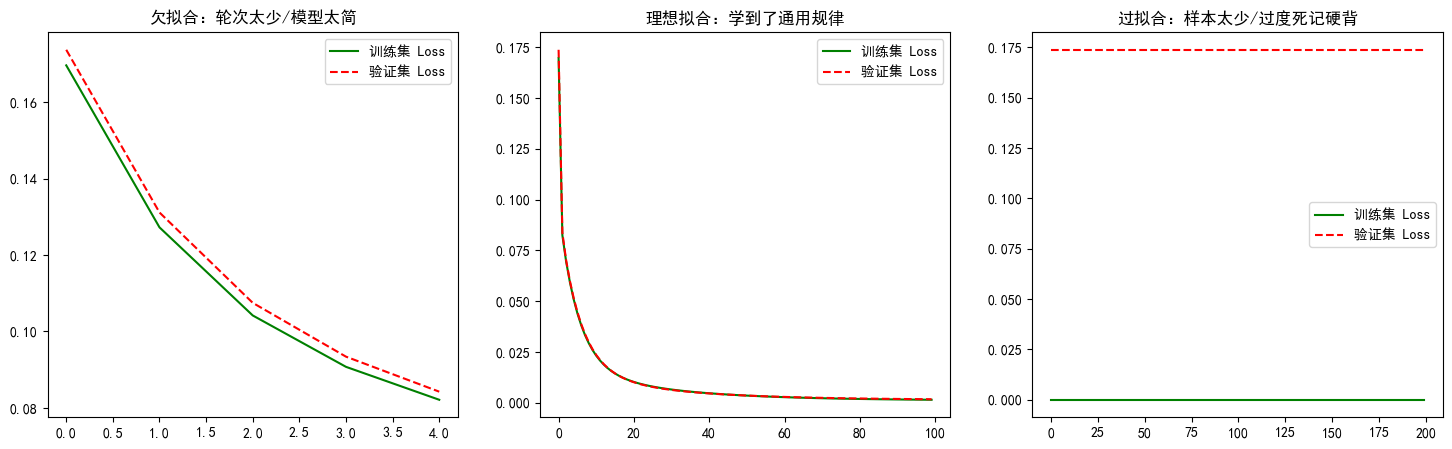

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. 环境配置
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 2. 读取数据
train_df = pd.read_csv('train_data.csv')
val_df = pd.read_csv('val_data.csv')

def get_X_y(df):
    features = ['Weather_Temperature_Celsius', 'Weather_Relative_Humidity', 
                'Global_Horizontal_Radiation', 'Diffuse_Horizontal_Radiation']
    return df[features].values, df['Active_Power'].values

X_train_all, y_train_all = get_X_y(train_df)
X_val, y_val = get_X_y(val_df)

# 3. 手动梯度下降函数（带验证集记录）
def gd_process(X_tr, y_tr, X_v, y_v, lr=0.3, epochs=100):
    n_samples, n_features = X_tr.shape
    w, b = np.zeros(n_features), 0.0
    t_loss_hist, v_loss_hist = [], []
    
    for i in range(epochs):
        # 前向传播
        y_p_tr = np.dot(X_tr, w) + b
        y_p_v = np.dot(X_v, w) + b
        # 记录 Loss
        t_loss_hist.append(np.mean((y_p_tr - y_tr)**2))
        v_loss_hist.append(np.mean((y_p_v - y_v)**2))
        # 梯度更新
        error = y_p_tr - y_tr
        w -= lr * (2 / n_samples) * np.dot(X_tr.T, error)
        b -= lr * (2 / n_samples) * np.sum(error)
    return t_loss_hist, v_loss_hist

# ---------------------------------------------------------
# 4. 模拟三种状态的训练过程
# ---------------------------------------------------------

# 情况 A：欠拟合 (训练轮次太少，还没学会)
loss_under_t, loss_under_v = gd_process(X_train_all, y_train_all, X_val, y_val, lr=0.1, epochs=5)

# 情况 B：理想拟合 (正常训练)
loss_good_t, loss_good_v = gd_process(X_train_all, y_train_all, X_val, y_val, lr=0.3, epochs=100)

# 情况 C：过拟合 (样本极小 + 迭代次数极多)
X_small, y_small = X_train_all[:10], y_train_all[:10] # 只给10个样本
loss_over_t, loss_over_v = gd_process(X_small, y_small, X_val, y_val, lr=0.3, epochs=200)

# ---------------------------------------------------------
# 5. 绘图：三位一体展示训练逻辑
# ---------------------------------------------------------
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 欠拟合图
axes[0].plot(loss_under_t, 'g-', label='训练集 Loss')
axes[0].plot(loss_under_v, 'r--', label='验证集 Loss')
axes[0].set_title('欠拟合：轮次太少/模型太简', fontsize=12)
axes[0].legend()

# 正常拟合图
axes[1].plot(loss_good_t, 'g-', label='训练集 Loss')
axes[1].plot(loss_good_v, 'r--', label='验证集 Loss')
axes[1].set_title('理想拟合：学到了通用规律', fontsize=12)
axes[1].legend()

# 过拟合图
axes[2].plot(loss_over_t, 'g-', label='训练集 Loss')
axes[2].plot(loss_over_v, 'r--', label='验证集 Loss')
axes[2].set_title('过拟合：样本太少/过度死记硬背', fontsize=12)
axes[2].legend()

plt.show()

# 9 结果可视化

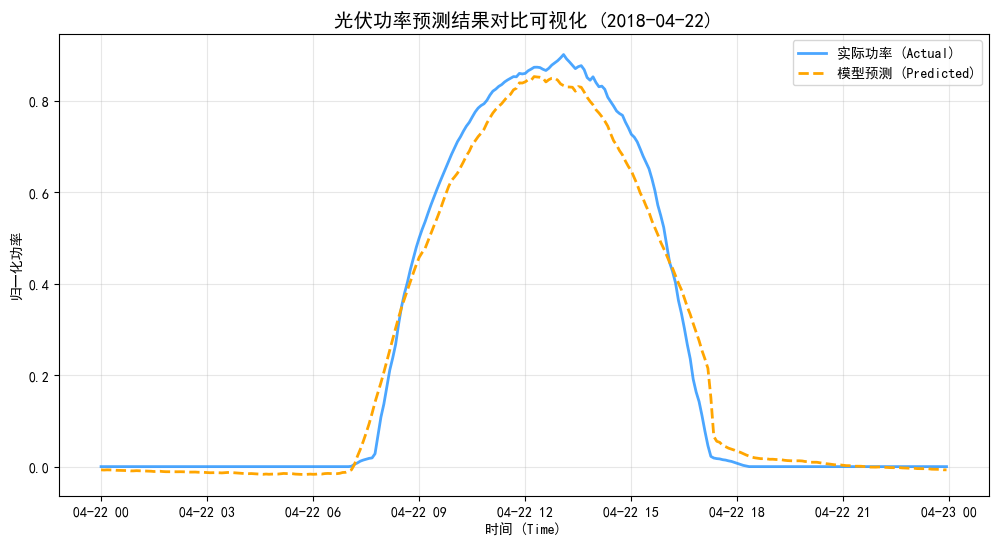

训练完成！模型公式为：y = 0.05x1 + -0.02x2 + 0.96x3 + 0.09x4 + (-0.0179)


In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. 环境配置
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 2. 读取训练集和验证集数据
train_df = pd.read_csv('train_data.csv', parse_dates=['timestamp'], index_col='timestamp')
val_df = pd.read_csv('val_data.csv', parse_dates=['timestamp'], index_col='timestamp')

# 定义特征与目标
features = ['Weather_Temperature_Celsius', 'Weather_Relative_Humidity', 
            'Global_Horizontal_Radiation', 'Diffuse_Horizontal_Radiation']
target = 'Active_Power'

X_train = train_df[features].values
y_train = train_df[target].values

# 3. 训练模型（批量梯度下降 BGD）
def gd_4var_with_b(X, y, lr=0.3, epochs=100):
    n_samples, n_features = X.shape
    w = np.zeros(n_features)
    b = 0.0
    for i in range(epochs):
        y_pred = np.dot(X, w) + b
        error = y_pred - y
        dw = (2 / n_samples) * np.dot(X.T, error)
        db = (2 / n_samples) * np.sum(error)
        w -= lr * dw
        b -= lr * db
    return w, b

# 得到最终的模型参数 final_w4 和 final_b
final_w4, final_b = gd_4var_with_b(X_train, y_train)

# ---------------------------------------------------------
# 4. 【可视化预测结果】：选取验证集中的 2018-04-22
# ---------------------------------------------------------
target_day = '2018-04-22'
day_data = val_df.loc[target_day]

# 提取这一天的特征 (x1-x4) 和 真实值 (y)
X_day = day_data[features].values
y_day_actual = day_data[target].values

# 使用训练好的模型参数 (final_w4, final_b) 进行预测
# 公式：y_pred = X * w + b
y_day_pred = np.dot(X_day, final_w4) + final_b

# 5. 绘图展示
plt.figure(figsize=(12, 6))

# 绘制真实曲线
plt.plot(day_data.index, y_day_actual, label='实际功率 (Actual)', color='dodgerblue', linewidth=2, alpha=0.8)

# 绘制预测曲线 (用虚线表示)
plt.plot(day_data.index, y_day_pred, label='模型预测 (Predicted)', color='orange', linestyle='--', linewidth=2)

# 图表装饰
plt.title(f'光伏功率预测结果对比可视化 ({target_day})', fontsize=14)
plt.xlabel('时间 (Time)')
plt.ylabel('归一化功率')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

print(f"训练完成！模型公式为：y = {final_w4[0]:.2f}x1 + {final_w4[1]:.2f}x2 + {final_w4[2]:.2f}x3 + {final_w4[3]:.2f}x4 + ({final_b:.4f})")